# Convolution Neural Network for CIFAR-10 image classification

_Author: Clara Le_

_Date: 01/11/2023_


In [1]:
# Python ≥3.5 is required
import sys
#assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
#assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', dpi=100)
import seaborn as sns; sns.set()


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11938027837199784640
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14357954560
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6777057955376855674
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
# Deep Learning imports
import tensorflow as tf

## 1. Load, investigate, manipulate and display the data


In [4]:
# Create a function to load data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
# Load data from batch_1
batch_1 = unpickle("/content/data_batch_1")

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [7]:
# Load data from batch_2
batch_2 = unpickle("/content/data_batch_2")

{b'batch_label': b'training batch 2 of 5',
 b'labels': [1,
  6,
  6,
  8,
  8,
  3,
  4,
  6,
  0,
  6,
  0,
  3,
  6,
  6,
  5,
  4,
  8,
  3,
  2,
  6,
  0,
  3,
  1,
  4,
  0,
  6,
  6,
  2,
  7,
  6,
  9,
  0,
  4,
  5,
  7,
  1,
  6,
  7,
  9,
  1,
  7,
  7,
  8,
  0,
  3,
  7,
  4,
  7,
  3,
  1,
  0,
  4,
  6,
  6,
  1,
  4,
  9,
  2,
  6,
  4,
  5,
  0,
  4,
  6,
  0,
  8,
  3,
  4,
  8,
  8,
  3,
  9,
  5,
  7,
  1,
  9,
  4,
  7,
  9,
  1,
  9,
  7,
  5,
  2,
  7,
  3,
  4,
  8,
  8,
  2,
  1,
  5,
  9,
  2,
  7,
  8,
  8,
  6,
  8,
  8,
  1,
  3,
  8,
  8,
  5,
  4,
  7,
  1,
  6,
  6,
  1,
  6,
  1,
  6,
  7,
  0,
  4,
  6,
  9,
  5,
  8,
  7,
  1,
  9,
  0,
  3,
  3,
  7,
  6,
  9,
  0,
  4,
  7,
  1,
  4,
  3,
  4,
  3,
  9,
  8,
  7,
  0,
  8,
  3,
  9,
  1,
  0,
  8,
  0,
  9,
  4,
  0,
  2,
  1,
  4,
  2,
  7,
  1,
  7,
  0,
  2,
  9,
  7,
  9,
  8,
  6,
  4,
  4,
  1,
  1,
  7,
  8,
  8,
  6,
  4,
  5,
  6,
  3,
  9,
  4,
  2,
  5,
  3,
  6,
  7,
  7,
  3,
  9,
  1,
 

In [8]:
# Load data from batch_3
batch_3 = unpickle("/content/data_batch_3")

{b'batch_label': b'training batch 3 of 5',
 b'labels': [8,
  5,
  0,
  6,
  9,
  2,
  8,
  3,
  6,
  2,
  7,
  4,
  6,
  9,
  0,
  0,
  7,
  3,
  7,
  2,
  5,
  6,
  6,
  0,
  9,
  6,
  8,
  6,
  7,
  2,
  7,
  5,
  3,
  3,
  3,
  0,
  6,
  5,
  2,
  0,
  8,
  8,
  1,
  5,
  4,
  0,
  4,
  1,
  2,
  4,
  3,
  2,
  8,
  5,
  4,
  2,
  1,
  1,
  3,
  5,
  4,
  2,
  7,
  7,
  8,
  2,
  5,
  3,
  9,
  9,
  0,
  6,
  7,
  2,
  1,
  5,
  5,
  2,
  7,
  1,
  3,
  8,
  8,
  5,
  5,
  4,
  0,
  5,
  1,
  8,
  5,
  3,
  5,
  6,
  7,
  9,
  4,
  0,
  6,
  7,
  8,
  5,
  2,
  4,
  6,
  0,
  6,
  1,
  4,
  7,
  8,
  3,
  2,
  6,
  1,
  6,
  4,
  3,
  8,
  1,
  4,
  3,
  5,
  4,
  0,
  2,
  5,
  0,
  8,
  9,
  2,
  3,
  0,
  4,
  9,
  6,
  4,
  4,
  2,
  3,
  5,
  6,
  4,
  3,
  3,
  2,
  6,
  4,
  6,
  2,
  8,
  3,
  3,
  3,
  4,
  1,
  5,
  4,
  7,
  3,
  6,
  8,
  1,
  3,
  5,
  9,
  7,
  9,
  1,
  0,
  7,
  5,
  9,
  4,
  3,
  7,
  9,
  6,
  5,
  7,
  0,
  9,
  8,
  2,
  3,
  5,
  7,
  9,
  0,
 

In [9]:
# Load data from batch_4
batch_4 = unpickle("/content/data_batch_4")

{b'batch_label': b'training batch 4 of 5',
 b'labels': [0,
  6,
  0,
  2,
  7,
  2,
  1,
  2,
  4,
  1,
  5,
  6,
  6,
  3,
  1,
  3,
  5,
  5,
  8,
  1,
  4,
  2,
  3,
  2,
  1,
  2,
  8,
  9,
  5,
  0,
  7,
  6,
  7,
  6,
  8,
  8,
  7,
  4,
  9,
  1,
  2,
  6,
  5,
  9,
  4,
  2,
  5,
  1,
  0,
  1,
  1,
  9,
  0,
  7,
  5,
  3,
  9,
  6,
  3,
  3,
  3,
  4,
  1,
  5,
  9,
  7,
  7,
  2,
  9,
  0,
  2,
  8,
  5,
  9,
  6,
  7,
  8,
  4,
  0,
  4,
  9,
  2,
  7,
  1,
  0,
  5,
  1,
  8,
  1,
  6,
  5,
  9,
  7,
  0,
  4,
  5,
  2,
  3,
  5,
  5,
  6,
  0,
  2,
  1,
  1,
  5,
  8,
  5,
  2,
  4,
  2,
  2,
  5,
  3,
  0,
  3,
  0,
  2,
  9,
  1,
  1,
  7,
  3,
  8,
  5,
  4,
  5,
  9,
  6,
  5,
  6,
  4,
  4,
  5,
  5,
  1,
  1,
  5,
  6,
  2,
  5,
  0,
  8,
  6,
  2,
  2,
  6,
  8,
  8,
  6,
  7,
  4,
  0,
  4,
  1,
  5,
  4,
  2,
  0,
  3,
  0,
  9,
  5,
  7,
  8,
  1,
  1,
  7,
  8,
  8,
  3,
  0,
  0,
  4,
  7,
  9,
  6,
  0,
  9,
  9,
  9,
  2,
  1,
  1,
  7,
  4,
  3,
  7,
  5,
 

In [10]:
# Load data from batch_5
batch_5 = unpickle("/content/data_batch_5")

{b'batch_label': b'training batch 5 of 5',
 b'labels': [1,
  8,
  5,
  1,
  5,
  7,
  4,
  3,
  8,
  2,
  7,
  2,
  0,
  1,
  5,
  9,
  6,
  2,
  0,
  8,
  2,
  7,
  0,
  4,
  1,
  7,
  7,
  4,
  4,
  9,
  9,
  6,
  2,
  4,
  1,
  6,
  4,
  9,
  6,
  6,
  9,
  6,
  9,
  9,
  5,
  7,
  1,
  6,
  8,
  2,
  9,
  5,
  9,
  5,
  3,
  7,
  1,
  3,
  3,
  9,
  1,
  7,
  8,
  9,
  7,
  4,
  3,
  4,
  9,
  5,
  8,
  4,
  9,
  3,
  6,
  1,
  1,
  4,
  3,
  9,
  9,
  1,
  9,
  9,
  2,
  4,
  3,
  2,
  4,
  7,
  1,
  5,
  1,
  8,
  6,
  3,
  6,
  3,
  4,
  4,
  9,
  9,
  9,
  7,
  0,
  5,
  7,
  7,
  4,
  8,
  8,
  4,
  2,
  0,
  5,
  2,
  4,
  9,
  1,
  7,
  7,
  4,
  8,
  8,
  8,
  0,
  2,
  3,
  6,
  3,
  9,
  0,
  8,
  2,
  2,
  4,
  8,
  8,
  1,
  8,
  5,
  7,
  6,
  0,
  9,
  1,
  4,
  8,
  2,
  1,
  0,
  5,
  1,
  6,
  5,
  3,
  4,
  9,
  9,
  0,
  3,
  5,
  4,
  2,
  6,
  3,
  9,
  4,
  9,
  8,
  6,
  4,
  1,
  1,
  9,
  8,
  2,
  2,
  1,
  8,
  5,
  9,
  7,
  8,
  1,
  1,
  4,
  2,
  4,
 

In [11]:
# Extract label and data from batch_1
label_batch_1 = batch_1[list(batch_1.keys())[1]]
data_batch_1 = batch_1[list(batch_1.keys())[2]]

In [12]:
# Extract label and data from batch_2
label_batch_2 = batch_2[list(batch_1.keys())[1]]
data_batch_2 = batch_2[list(batch_1.keys())[2]]

array([[ 35,  27,  25, ..., 169, 168, 168],
       [ 20,  20,  18, ..., 111,  97,  51],
       [116, 115, 155, ...,  18,  84, 124],
       ...,
       [127, 139, 155, ..., 197, 192, 191],
       [190, 200, 208, ..., 163, 182, 192],
       [177, 174, 182, ..., 119, 127, 136]], dtype=uint8)

In [13]:
# Extract label and data from batch_3
label_batch_3 = batch_3[list(batch_1.keys())[1]]
data_batch_3 = batch_3[list(batch_1.keys())[2]]

array([[ 26,  17,  13, ...,  27,  26,  27],
       [ 94, 101,  95, ..., 182, 184, 155],
       [183, 158, 166, ..., 250, 250, 250],
       ...,
       [175, 200, 207, ..., 124,  49,  32],
       [ 28,  59,  67, ...,  36,  44,  41],
       [ 62,  40,  61, ..., 127, 124, 116]], dtype=uint8)

In [14]:
# Extract label and data from batch_4
label_batch_4 = batch_4[list(batch_1.keys())[1]]
data_batch_4 = batch_4[list(batch_1.keys())[2]]

array([[178, 178, 178, ...,  80,  80,  77],
       [ 29,  22,  25, ...,  29,  31,  30],
       [ 36,  33,  21, ..., 173, 170, 170],
       ...,
       [167, 164, 151, ..., 132, 142, 130],
       [ 45,  46,  46, ...,  30,  34,  24],
       [235, 239, 239, ..., 182, 175, 174]], dtype=uint8)

In [15]:
# Extract label and data from batch_5
label_batch_5 = batch_5[list(batch_1.keys())[1]]
data_batch_5 = batch_5[list(batch_1.keys())[2]]

array([[255, 252, 253, ..., 173, 231, 248],
       [127, 126, 127, ..., 102, 108, 112],
       [116,  64,  19, ...,   7,   6,   5],
       ...,
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)

In [16]:
# Load data from batch test
batch_test = unpickle("/content/test_batch")

{b'batch_label': b'testing batch 1 of 1',
 b'labels': [3,
  8,
  8,
  0,
  6,
  6,
  1,
  6,
  3,
  1,
  0,
  9,
  5,
  7,
  9,
  8,
  5,
  7,
  8,
  6,
  7,
  0,
  4,
  9,
  5,
  2,
  4,
  0,
  9,
  6,
  6,
  5,
  4,
  5,
  9,
  2,
  4,
  1,
  9,
  5,
  4,
  6,
  5,
  6,
  0,
  9,
  3,
  9,
  7,
  6,
  9,
  8,
  0,
  3,
  8,
  8,
  7,
  7,
  4,
  6,
  7,
  3,
  6,
  3,
  6,
  2,
  1,
  2,
  3,
  7,
  2,
  6,
  8,
  8,
  0,
  2,
  9,
  3,
  3,
  8,
  8,
  1,
  1,
  7,
  2,
  5,
  2,
  7,
  8,
  9,
  0,
  3,
  8,
  6,
  4,
  6,
  6,
  0,
  0,
  7,
  4,
  5,
  6,
  3,
  1,
  1,
  3,
  6,
  8,
  7,
  4,
  0,
  6,
  2,
  1,
  3,
  0,
  4,
  2,
  7,
  8,
  3,
  1,
  2,
  8,
  0,
  8,
  3,
  5,
  2,
  4,
  1,
  8,
  9,
  1,
  2,
  9,
  7,
  2,
  9,
  6,
  5,
  6,
  3,
  8,
  7,
  6,
  2,
  5,
  2,
  8,
  9,
  6,
  0,
  0,
  5,
  2,
  9,
  5,
  4,
  2,
  1,
  6,
  6,
  8,
  4,
  8,
  4,
  5,
  0,
  9,
  9,
  9,
  8,
  9,
  9,
  3,
  7,
  5,
  0,
  0,
  5,
  2,
  2,
  3,
  8,
  6,
  3,
  4,
  

In [17]:
# Extract label and data from batch_test
label_batch_test = batch_test[list(batch_test.keys())[1]]
data_batch_test = batch_test[list(batch_test.keys())[2]]

array([[158, 159, 165, ..., 124, 129, 110],
       [235, 231, 232, ..., 178, 191, 199],
       [158, 158, 139, ...,   8,   3,   7],
       ...,
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

In [18]:
# Create dataframes of labels
label_batch_1 = pd.DataFrame(label_batch_1)
label_batch_2 = pd.DataFrame(label_batch_2)
label_batch_3 = pd.DataFrame(label_batch_3)
label_batch_4 = pd.DataFrame(label_batch_4)
label_batch_5 = pd.DataFrame(label_batch_5)

# Gather labels into 'y_train'
y_train = pd.concat([label_batch_1, label_batch_2, label_batch_3, label_batch_4, label_batch_5], axis=0)

,0
0,6
1,9
2,9
3,4
4,1
...,...
9995,2
9996,6
9997,9
9998,1


In [19]:
# Create dataframes of data
data_batch_1 = pd.DataFrame(data_batch_1)
data_batch_2 = pd.DataFrame(data_batch_2)
data_batch_3 = pd.DataFrame(data_batch_3)
data_batch_4 = pd.DataFrame(data_batch_4)
data_batch_5 = pd.DataFrame(data_batch_5)

# Gather data into 'X_train' dataframe
X_train = pd.concat([data_batch_1, data_batch_2, data_batch_3, data_batch_4, data_batch_5], axis=0)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,43,50,68,98,119,139,145,149,149,...,59,58,65,59,46,57,104,140,84,72
1,154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
2,255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
4,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,145,151,156,155,153,153,157,161,161,161,...,72,68,64,61,63,59,57,56,53,54
9996,255,254,255,254,254,254,254,253,254,254,...,57,61,64,68,64,76,82,79,81,76
9997,35,40,42,39,43,45,48,51,53,56,...,91,94,104,103,96,93,87,77,66,50
9998,189,186,185,184,182,181,180,180,181,180,...,160,166,171,171,172,169,165,169,171,171


In [20]:
# Create X_test including data and y_test including label
X_test = pd.DataFrame(data_batch_test)
y_test = pd.DataFrame(label_batch_test)

In [21]:
# Create training dataset
train_set = pd.concat([y_train,X_train], axis = 1)
print('The shape of training data is:', train_set.shape)

The shape of training data is: (50000, 3073)


In [ ]:
print("Some statistic values of training data columns: \n")
train_set.describe()

Some statistic values of training data columns: 



,0,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,4.50000,130.710740,130.14036,131.050440,131.568860,132.184700,132.851840,133.371540,133.890920,134.485040,...,113.70824,113.716260,113.735320,113.778520,113.813200,113.864120,113.877800,113.830580,113.906240,114.381860
std,2.87231,73.412873,72.44259,72.240546,72.016555,71.714551,71.537505,71.353558,71.281237,71.071698,...,64.21183,64.345623,64.431996,64.401897,64.502684,64.511269,64.738943,64.894603,65.212671,66.077526
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,71.000000,71.00000,73.000000,73.000000,75.000000,75.000000,76.000000,76.750000,78.000000,...,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,63.000000
50%,4.50000,128.000000,127.00000,129.000000,130.000000,130.000000,131.000000,132.000000,132.000000,133.000000,...,106.00000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
75%,7.00000,189.000000,188.00000,188.000000,188.000000,189.000000,190.000000,190.000000,191.000000,191.000000,...,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,158.000000
max,9.00000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
print('The first 6 rows of training data: \n')
train_set.head()

The first 6 rows of training data: 



,0,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,59,43,50,68,98,119,139,145,149,...,59,58,65,59,46,57,104,140,84,72
1,9,154,126,105,102,125,155,172,180,142,...,22,42,67,101,122,133,136,139,142,144
2,9,255,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,4,28,37,38,42,44,40,40,24,32,...,53,39,59,42,44,48,38,28,37,46
4,1,170,168,177,183,181,177,181,184,189,...,92,88,85,82,83,79,78,82,78,80


In [22]:
# Create testing dataset
test_set = pd.concat([y_test,X_test], axis = 1)
print('The shape of testing data is:', test_set.shape)
print("Some statistic values of testing data columns: \n")
test_set.describe()

The shape of testing data is: (10000, 3073)
Some statistic values of testing data columns: 



,0,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.500000,130.535400,129.993900,131.145000,132.146800,132.9294,133.538900,134.117600,134.701800,135.26150,...,114.388800,114.382400,114.698300,114.557900,114.497500,114.730200,114.760400,114.844100,114.776000,115.327100
std,2.872425,73.333214,72.397388,72.288499,71.739001,71.3252,71.209804,71.014037,71.088556,70.97164,...,63.641622,63.828172,63.963818,63.881227,64.134915,64.153092,64.333828,64.443142,64.911164,65.662591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,70.000000,71.000000,73.000000,75.000000,76.0000,77.000000,77.000000,78.000000,78.75000,...,65.000000,65.750000,66.000000,66.000000,65.000000,66.000000,65.000000,65.000000,65.000000,65.000000
50%,4.500000,127.000000,127.000000,128.000000,129.000000,130.0000,132.000000,133.000000,133.000000,134.00000,...,107.000000,106.000000,107.000000,107.000000,106.000000,106.000000,107.000000,106.000000,106.000000,106.000000
75%,7.000000,188.000000,187.000000,189.000000,190.000000,190.0000,190.000000,191.000000,192.000000,192.00000,...,157.000000,157.000000,157.000000,157.250000,158.000000,157.000000,158.000000,158.000000,158.000000,160.000000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.0000,255.000000,255.000000,255.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
print('The first 6 rows of testing data: \n')
test_set.head()

The first 6 rows of testing data: 



,0,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,158,159,165,166,160,156,162,159,158,...,130,123,145,167,182,175,145,124,129,110
1,8,235,231,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,8,158,158,139,132,166,182,187,193,199,...,45,46,44,44,43,52,37,8,3,7
3,0,155,167,176,190,177,166,168,166,170,...,52,55,70,103,105,72,53,50,52,50
4,6,65,70,48,30,23,40,44,45,45,...,102,127,156,139,131,130,147,136,146,117


In [23]:
# Split the testing set into a validation set and a testing set
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state= 2023, stratify=y_test)
validation_set = pd.concat([y_val, X_val], axis=1)
test_set = pd.concat([y_test, X_test], axis=1)


print("The shape of validation set after spliting: \n")
print(validation_set.shape)
print("\n")
print("The shape of testing set after spliting: \n")
print(test_set.shape)
print("\n")

The shape of validation set after spliting: 

(5000, 3073)


The shape of testing set after spliting: 

(5000, 3073)




In [ ]:
print("The first 6 rows of validation set after spliting:\n")
validation_set.head()

The first 6 rows of validation set after spliting:



,0,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
4511,6,5,38,91,114,119,122,128,127,137,...,108,93,77,57,56,69,76,84,91,83
189,0,177,127,118,114,135,149,171,147,110,...,154,144,143,129,148,138,126,134,150,130
4250,1,9,17,18,19,19,17,19,22,23,...,22,21,21,21,20,20,22,23,25,16
9196,0,39,37,34,30,29,30,34,35,33,...,186,171,163,163,162,193,215,215,204,186
5737,9,255,255,255,255,255,255,255,255,255,...,164,228,225,219,214,206,199,197,193,186


In [ ]:
print("The first 6 rows of testing set after spliting:\n")
test_set.head()

The first 6 rows of testing set after spliting:



,0,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
3226,8,149,155,161,168,171,171,171,169,169,...,215,214,213,211,210,209,206,201,196,192
9963,8,202,185,181,170,159,152,148,143,135,...,114,116,114,113,116,119,119,119,122,123
7752,9,244,250,255,255,255,255,255,252,246,...,255,255,255,255,255,255,255,255,255,255
9925,4,181,163,150,158,149,142,179,200,196,...,112,110,115,122,128,130,131,126,119,128
7765,8,67,64,61,58,63,63,77,74,70,...,61,62,51,39,32,31,41,66,71,74


In [24]:
# Split the training data into X_train and y_train
# Split the testing data into X_test and y_test
# Split the validation data into X_val and y_val
X_train = train_set.iloc[:, 1:]
X_test = test_set.iloc[:, 1:]
X_val = validation_set.iloc[:, 1:]
y_train = train_set.iloc[:, 0]
y_test = test_set.iloc[:, 0]
y_val = validation_set.iloc[:, 0]

print("The shape of X_train is: ", X_train.shape)
print("The shape of y_train is: ", y_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_test is: ", y_test.shape)
print("The shape of X_val is: ", X_val.shape)
print("The shape of y_val is: ", y_val.shape)

The shape of X_train is:  (50000, 3072)
The shape of y_train is:  (50000,)
The shape of X_test is:  (5000, 3072)
The shape of y_test is:  (5000,)
The shape of X_val is:  (5000, 3072)
The shape of y_val is:  (5000,)


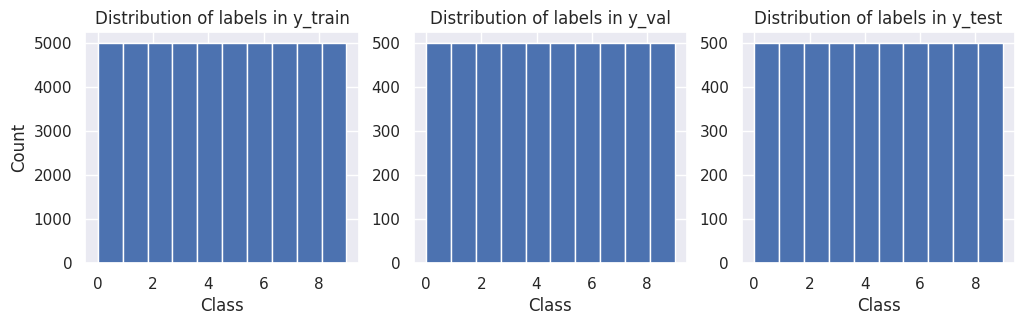

In [ ]:
# Checking distribution of lables in y_train, y_test, and y_val
fig, sub = plt.subplots(1, 3)
fig.set_size_inches(12,3)
sub[0].hist(y_train)
sub[0].set_ylabel('Count')
sub[0].set_xlabel('Class')
sub[0].set_title('Distribution of labels in y_train')
sub[1].hist(y_val)
sub[1].set_xlabel('Class')
sub[1].set_title('Distribution of labels in y_val')
sub[2].hist(y_test)
sub[2].set_xlabel('Class')
sub[2].set_title('Distribution of labels in y_test')
plt.show()

In [ ]:
# Labels of image
print(y_train.unique())

[6 9 4 1 2 7 8 3 5 0]


In [25]:
# Perform standard scaling for X_train
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
X_train_standardscaler = standard_scaler.fit_transform(X_train)
pd.DataFrame(X_train_standardscaler).describe()


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,1.758593e-16,1.790568e-16,-1.230660e-16,-1.350031e-17,1.161027e-16,-1.398348e-16,-1.425349e-16,8.299139e-17,2.842171e-17,-1.128342e-16,...,-4.302336e-17,-8.171241e-17,-2.280842e-17,-7.602807e-18,7.634782e-17,-4.760636e-18,1.125500e-16,3.431921e-17,4.632739e-17,-5.137224e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.780506e+00,-1.796480e+00,-1.814102e+00,-1.826943e+00,-1.843225e+00,-1.857112e+00,-1.869183e+00,-1.878366e+00,-1.892264e+00,-1.899502e+00,...,-1.770848e+00,-1.767290e+00,-1.765217e+00,-1.766713e+00,-1.764490e+00,-1.765044e+00,-1.759048e+00,-1.754101e+00,-1.746706e+00,-1.731042e+00
25%,-8.133633e-01,-8.163837e-01,-8.035795e-01,-8.132775e-01,-7.974012e-01,-8.087005e-01,-8.040540e-01,-8.016344e-01,-7.947693e-01,-8.014639e-01,...,-7.741368e-01,-7.726517e-01,-7.719118e-01,-7.729433e-01,-7.722733e-01,-7.729598e-01,-7.704528e-01,-7.678771e-01,-7.652921e-01,-7.776074e-01
50%,-3.692496e-02,-4.335007e-02,-2.838379e-02,-2.178493e-02,-3.046414e-02,-2.588654e-02,-1.922194e-02,-2.652786e-02,-2.089516e-02,-1.312860e-02,...,-1.200451e-01,-1.199202e-01,-1.200552e-01,-1.207821e-01,-1.211311e-01,-1.219043e-01,-1.216869e-01,-1.206673e-01,-1.212390e-01,-1.268501e-01
75%,7.940003e-01,7.987044e-01,7.883402e-01,7.835935e-01,7.922502e-01,7.988639e-01,7.936398e-01,8.011877e-01,7.951903e-01,8.033616e-01,...,6.742090e-01,6.726825e-01,6.714849e-01,6.711279e-01,6.695416e-01,6.686632e-01,6.661003e-01,6.652302e-01,6.608254e-01,6.601121e-01
max,1.693034e+00,1.723584e+00,1.715807e+00,1.713944e+00,1.712575e+00,1.707487e+00,1.704606e+00,1.699049e+00,1.695698e+00,1.690239e+00,...,2.200423e+00,2.195723e+00,2.192484e+00,2.192837e+00,2.188873e+00,2.187793e+00,2.179887e+00,2.175386e+00,2.163616e+00,2.128099e+00


In [ ]:
# Perform maxmin scaling for X_train
from sklearn.preprocessing import StandardScaler, MinMaxScaler
maxmin_scaler = MinMaxScaler()
X_train_minmaxscaler = maxmin_scaler.fit_transform(X_train)
pd.DataFrame(X_train_minmaxscaler).describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.512591,0.510354,0.513923,0.515956,0.518371,0.520988,0.523026,0.525062,0.527392,0.529147,...,0.445915,0.445946,0.446021,0.446190,0.446326,0.446526,0.446580,0.446394,0.446691,0.448556
std,0.287894,0.284089,0.283296,0.282418,0.281234,0.280539,0.279818,0.279534,0.278713,0.278574,...,0.251811,0.252336,0.252674,0.252556,0.252952,0.252985,0.253878,0.254489,0.255736,0.259128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278431,0.278431,0.286275,0.286275,0.294118,0.294118,0.298039,0.300980,0.305882,0.305882,...,0.250980,0.250980,0.250980,0.250980,0.250980,0.250980,0.250980,0.250980,0.250980,0.247059
50%,0.501961,0.498039,0.505882,0.509804,0.509804,0.513725,0.517647,0.517647,0.521569,0.525490,...,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686
75%,0.741176,0.737255,0.737255,0.737255,0.741176,0.745098,0.745098,0.749020,0.749020,0.752941,...,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.619608
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Convert X_train, X_test, X_val to 3D array after using Standard scaling
X_train_standardscaler = np.array(X_train_standardscaler).reshape((-1, 3, 32, 32)).transpose(0,2,3,1)
print('The shape of standard scaled X_train after converting to an array is: ', X_train_standardscaler.shape)

X_test_standardscaler = standard_scaler.transform(X_test)
X_test_standardscaler = np.array(X_test_standardscaler).reshape((-1, 3, 32, 32)).transpose(0,2,3,1)
print('The shape of standard scaled X_test after converting to an array is: ', X_test_standardscaler.shape)

X_val_standardscaler = standard_scaler.transform(X_val)
X_val_standardscaler = np.array(X_val_standardscaler).reshape((-1, 3, 32, 32)).transpose(0,2,3,1)
print('The shape of standard scaled X_val after converting to an array is: ', X_val_standardscaler.shape)

The shape of standard scaled X_train after converting to an array is:  (50000, 32, 32, 3)
The shape of standard scaled X_test after converting to an array is:  (5000, 32, 32, 3)
The shape of standard scaled X_val after converting to an array is:  (5000, 32, 32, 3)


In [ ]:
# Convert X_train, X_test, X_val to 3D array after using MaxMin scaling
X_train_minmaxscaler = np.array(X_train_minmaxscaler).reshape((-1, 3, 32, 32)).transpose(0,2,3,1)
print('The shape of Max-Min scaled X_train after converting to an array is: ', X_train_minmaxscaler.shape)

X_test_minmaxscaler = maxmin_scaler.transform(X_test)
X_test_minmaxscaler = np.array(X_test_minmaxscaler).reshape((-1, 3, 32, 32)).transpose(0,2,3,1)
print('The shape of Max-Min scaled X_test after converting to an array is: ', X_test_minmaxscaler.shape)

X_val_minmaxscaler = maxmin_scaler.transform(X_val)
X_val_minmaxscaler = np.array(X_val_minmaxscaler).reshape((-1, 3, 32, 32)).transpose(0,2,3,1)
print('The shape of Max-Min scaled X_val after converting to an array is: ', X_val_minmaxscaler.shape)

The shape of Max-Min scaled X_train after converting to an array is:  (50000, 32, 32, 3)
The shape of Max-Min scaled X_test after converting to an array is:  (5000, 32, 32, 3)
The shape of Max-Min scaled X_val after converting to an array is:  (5000, 32, 32, 3)


In [ ]:
# Convert original X_train, X_test, X_val to 3D array
X_train = np.array(X_train).reshape((-1, 3, 32, 32)).transpose(0,2,3,1)
print('The shape of original X_train after converting to an array is: ', X_train.shape)
X_test = np.array(X_test).reshape((-1, 3, 32, 32)).transpose(0,2,3,1)
print('The shape of original X_test after converting to an array is: ', X_test.shape)
X_val = np.array(X_val).reshape((-1, 3, 32, 32)).transpose(0,2,3,1)
print('The shape of original X_val after converting to an array is: ', X_val.shape)

The shape of original X_train after converting to an array is:  (50000, 32, 32, 3)
The shape of original X_test after converting to an array is:  (5000, 32, 32, 3)
The shape of original X_val after converting to an array is:  (5000, 32, 32, 3)


Label:  0


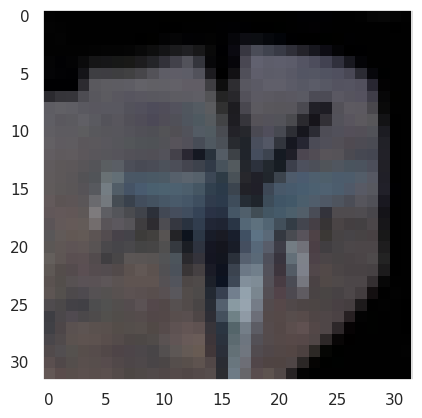

Label:  1


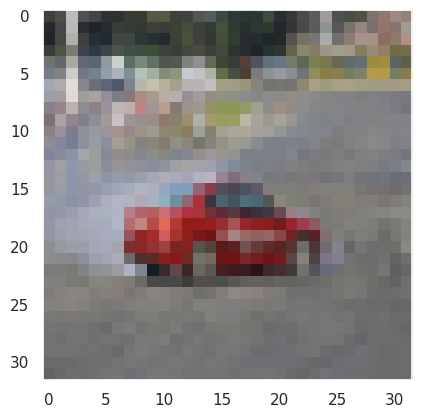

Label:  2


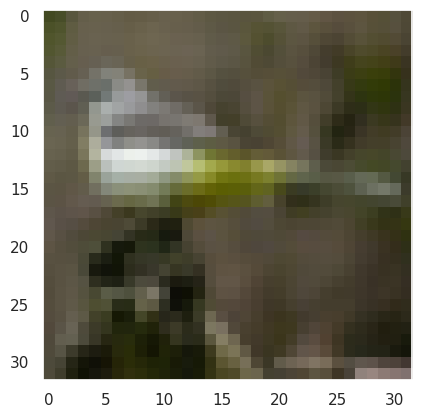

Label:  3


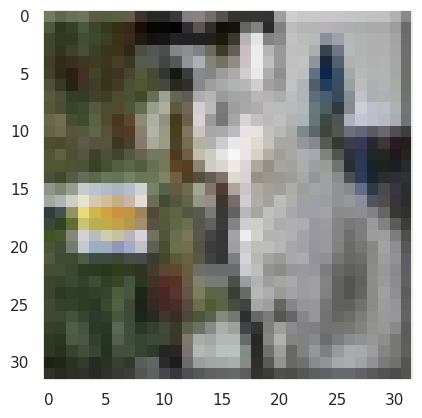

Label:  4


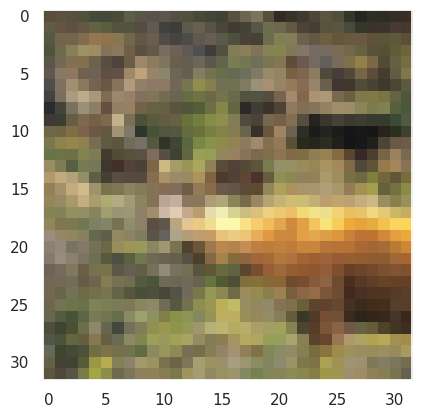

Label:  5


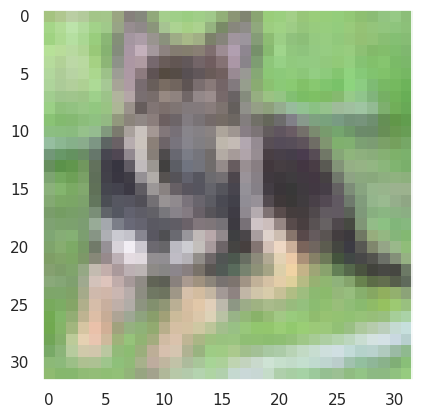

Label:  6


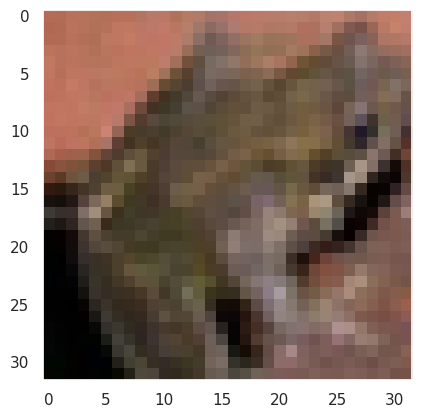

Label:  7


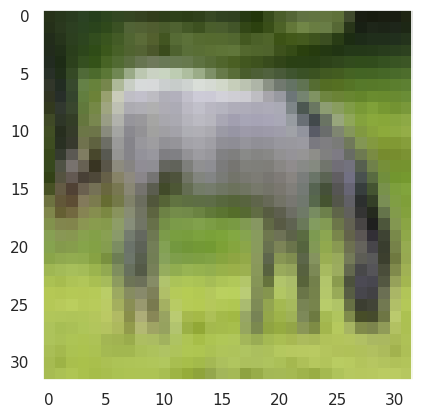

Label:  8


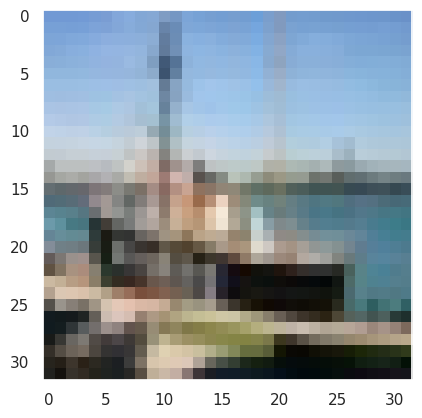

Label:  9


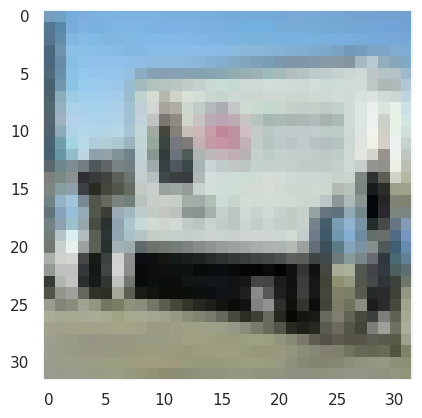

In [ ]:
# Show images for each label
for i in list(np.sort(y_train.unique())):
    print('Label: ',i)
    img = X_train[train_set[train_set.iloc[:,0] == i].index[10]]
    plt.imshow(img)
    plt.grid(False)
    plt.show()

## 2. Build baseline models


In [ ]:
# Build a baseline model with original dataset
from tensorflow import keras

optimizer_bs = keras.optimizers.legacy.SGD
learningrate_bs = 0.001
batch_size_bs = 100
n_epochs_bs = 300
early_stopping_bs = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_bs = keras.models.Sequential()
model_bs.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs.add(keras.layers.Dropout(0.01))
model_bs.add(keras.layers.Flatten())
model_bs.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs.add(keras.layers.Dropout(0.1))
model_bs.add(keras.layers.Dense(10, activation = "softmax"))
model_bs.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs = model_bs.fit(X_train, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val, y_val))

Epoch 1/300
1563/1563 [==============================] - 17s 4ms/step - loss: nan - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/300
1563/1563 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/300
1563/1563 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/300
1563/1563 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


In [ ]:
# Build a baseline model with Standard scaled dataset
model_bs_1 = keras.models.Sequential()
model_bs_1.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_1.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_1.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_1.add(keras.layers.Dropout(0.01))
model_bs_1.add(keras.layers.Flatten())
model_bs_1.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_1.add(keras.layers.Dropout(0.1))
model_bs_1.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_1 = model_bs_1.fit(X_train_standardscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_standardscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8328 - accuracy: 0.3554 - val_loss: 1.6479 - val_accuracy: 0.4292
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5967 - accuracy: 0.4471 - val_loss: 1.5226 - val_accuracy: 0.4764
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4950 - accuracy: 0.4834 - val_loss: 1.4564 - val_accuracy: 0.5010
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4260 - accuracy: 0.5109 - val_loss: 1.4003 - val_accuracy: 0.5212
Epoch 5/300
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3686 - accuracy: 0.5316 - val_loss: 1.3591 - val_accuracy: 0.5352
Epoch 6/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3241 - accuracy: 0.5436 - val_loss: 1.3246 - val_accuracy: 0.5432
Epoch 7/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2835 - accuracy: 0.5592 - val_loss: 1.2936 - val_ac

In [ ]:
# Build a baseline model with Max-Min scaled dataset
model_bs_2 = keras.models.Sequential()
model_bs_2.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_2.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_2.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_2.add(keras.layers.Dropout(0.01))
model_bs_2.add(keras.layers.Flatten())
model_bs_2.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_2.add(keras.layers.Dropout(0.1))
model_bs_2.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_2 = model_bs_2.fit(X_train_minmaxscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_minmaxscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0876 - accuracy: 0.2636 - val_loss: 1.9465 - val_accuracy: 0.3426
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8915 - accuracy: 0.3421 - val_loss: 1.8312 - val_accuracy: 0.3572
Epoch 3/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8092 - accuracy: 0.3721 - val_loss: 1.7595 - val_accuracy: 0.3968
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7522 - accuracy: 0.3901 - val_loss: 1.7237 - val_accuracy: 0.3966
Epoch 5/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7046 - accuracy: 0.4085 - val_loss: 1.6684 - val_accuracy: 0.4284
Epoch 6/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6657 - accuracy: 0.4204 - val_loss: 1.6451 - val_accuracy: 0.4174
Epoch 7/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6304 - accuracy: 0.4310 - val_loss: 1.5991 - val_ac

In [ ]:
# Build a baseline model with original dataset, flip input data
model_bs_3 = keras.models.Sequential()
model_bs_3.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_3.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_3.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_3.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_3.add(keras.layers.Dropout(0.01))
model_bs_3.add(keras.layers.Flatten())
model_bs_3.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_3.add(keras.layers.Dropout(0.1))
model_bs_3.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_3 = model_bs_3.fit(X_train, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val, y_val))

Epoch 1/300
1563/1563 [==============================] - 21s 13ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/300
1563/1563 [==============================] - 23s 15ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/300
1563/1563 [==============================] - 23s 15ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/300
1563/1563 [==============================] - 21s 13ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/300
1563/1563 [==============================] - 20s 13ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


In [ ]:
# Build a baseline model with Standard scaled dataset, flip input data
model_bs_4 = keras.models.Sequential()
model_bs_4.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_4.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_4.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_4.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_4.add(keras.layers.Dropout(0.01))
model_bs_4.add(keras.layers.Flatten())
model_bs_4.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_4.add(keras.layers.Dropout(0.1))
model_bs_4.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_4.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_4 = model_bs_4.fit(X_train_standardscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_standardscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9605 - accuracy: 0.3114 - val_loss: 1.8039 - val_accuracy: 0.3826
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7677 - accuracy: 0.3809 - val_loss: 1.6892 - val_accuracy: 0.4196
Epoch 3/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6851 - accuracy: 0.4121 - val_loss: 1.6377 - val_accuracy: 0.4320
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6269 - accuracy: 0.4342 - val_loss: 1.5829 - val_accuracy: 0.4454
Epoch 5/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5782 - accuracy: 0.4510 - val_loss: 1.5395 - val_accuracy: 0.4644
Epoch 6/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5356 - accuracy: 0.4666 - val_loss: 1.4837 - val_accuracy: 0.4836
Epoch 7/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4961 - accuracy: 0.4792 - val_loss: 1.4603 - val_ac

In [ ]:
# Build a baseline model with Max_min scaled dataset, flip input data
model_bs_5 = keras.models.Sequential()
model_bs_5.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_5.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_5.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_5.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_5.add(keras.layers.Dropout(0.01))
model_bs_5.add(keras.layers.Flatten())
model_bs_5.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_5.add(keras.layers.Dropout(0.1))
model_bs_5.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_5.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_5 = model_bs_5.fit(X_train_minmaxscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_minmaxscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1580 - accuracy: 0.2370 - val_loss: 2.0434 - val_accuracy: 0.2900
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9909 - accuracy: 0.3083 - val_loss: 1.9381 - val_accuracy: 0.3320
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9152 - accuracy: 0.3338 - val_loss: 1.8838 - val_accuracy: 0.3492
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8669 - accuracy: 0.3495 - val_loss: 1.8295 - val_accuracy: 0.3670
Epoch 5/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8260 - accuracy: 0.3629 - val_loss: 1.7978 - val_accuracy: 0.3756
Epoch 6/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7937 - accuracy: 0.3705 - val_loss: 1.7632 - val_accuracy: 0.3916
Epoch 7/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7644 - accuracy: 0.3798 - val_loss: 1.7462 - val_ac

In [ ]:
# Build a baseline model with original dataset, rotate input data
model_bs_6 = keras.models.Sequential()
model_bs_6.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_6.add(keras.layers.RandomRotation(0.2))
model_bs_6.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_6.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_6.add(keras.layers.Dropout(0.01))
model_bs_6.add(keras.layers.Flatten())
model_bs_6.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_6.add(keras.layers.Dropout(0.1))
model_bs_6.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_6.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_6 = model_bs_6.fit(X_train, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


In [ ]:
# Build a baseline model with Standard scaled dataset, rotate input data
model_bs_7 = keras.models.Sequential()
model_bs_7.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_7.add(keras.layers.RandomRotation(0.2))
model_bs_7.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_7.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_7.add(keras.layers.Dropout(0.01))
model_bs_7.add(keras.layers.Flatten())
model_bs_7.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_7.add(keras.layers.Dropout(0.1))
model_bs_7.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_7.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_7 = model_bs_7.fit(X_train_standardscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_standardscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9455 - accuracy: 0.3061 - val_loss: 1.7514 - val_accuracy: 0.3882
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7706 - accuracy: 0.3809 - val_loss: 1.6508 - val_accuracy: 0.4288
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7066 - accuracy: 0.4042 - val_loss: 1.6044 - val_accuracy: 0.4434
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6619 - accuracy: 0.4213 - val_loss: 1.5679 - val_accuracy: 0.4498
Epoch 5/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6242 - accuracy: 0.4360 - val_loss: 1.5336 - val_accuracy: 0.4636
Epoch 6/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5938 - accuracy: 0.4430 - val_loss: 1.5203 - val_accuracy: 0.4648
Epoch 7/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5746 - accuracy: 0.4521 - val_loss: 1.5015 - val_ac

In [ ]:
# Build a baseline model with Max_min scaled dataset, rotate input data
model_bs_8 = keras.models.Sequential()
model_bs_8.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_8.add(keras.layers.RandomRotation(0.2))
model_bs_8.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_8.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_8.add(keras.layers.Dropout(0.01))
model_bs_8.add(keras.layers.Flatten())
model_bs_8.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_8.add(keras.layers.Dropout(0.1))
model_bs_8.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_8.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_8 = model_bs_8.fit(X_train_minmaxscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_minmaxscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1692 - accuracy: 0.2184 - val_loss: 2.0250 - val_accuracy: 0.2892
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0000 - accuracy: 0.2914 - val_loss: 1.9115 - val_accuracy: 0.3272
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9236 - accuracy: 0.3170 - val_loss: 1.8446 - val_accuracy: 0.3510
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8790 - accuracy: 0.3357 - val_loss: 1.8019 - val_accuracy: 0.3714
Epoch 5/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8452 - accuracy: 0.3518 - val_loss: 1.7684 - val_accuracy: 0.3742
Epoch 6/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8136 - accuracy: 0.3611 - val_loss: 1.7531 - val_accuracy: 0.3882
Epoch 7/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7888 - accuracy: 0.3697 - val_loss: 1.7503 - val_ac

In [ ]:
# Build a baseline model with original dataset, random contrast input data
model_bs_9 = keras.models.Sequential()
model_bs_9.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_9.add(keras.layers.RandomContrast(factor=0.2))
model_bs_9.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_9.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_9.add(keras.layers.Dropout(0.01))
model_bs_9.add(keras.layers.Flatten())
model_bs_9.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_9.add(keras.layers.Dropout(0.1))
model_bs_9.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_9.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_9 = model_bs_9.fit(X_train, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val, y_val))

Epoch 1/300
1563/1563 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


In [ ]:
# Build a baseline model with Standard scaled dataset, random contrast input data
model_bs_10 = keras.models.Sequential()
model_bs_10.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_10.add(keras.layers.RandomContrast(factor=0.2))
model_bs_10.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_10.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_10.add(keras.layers.Dropout(0.01))
model_bs_10.add(keras.layers.Flatten())
model_bs_10.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_10.add(keras.layers.Dropout(0.1))
model_bs_10.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_10.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_10 = model_bs_10.fit(X_train_standardscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_standardscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0034 - accuracy: 0.2970 - val_loss: 1.8763 - val_accuracy: 0.3282
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8279 - accuracy: 0.3716 - val_loss: 1.9319 - val_accuracy: 0.3422
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7365 - accuracy: 0.4004 - val_loss: 2.0503 - val_accuracy: 0.3524
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6757 - accuracy: 0.4217 - val_loss: 2.1824 - val_accuracy: 0.3550
Epoch 5/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6288 - accuracy: 0.4372 - val_loss: 2.2847 - val_accuracy: 0.3700
Epoch 6/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5930 - accuracy: 0.4493 - val_loss: 2.4112 - val_accuracy: 0.3734


In [ ]:
# Build a baseline model with Max_min scaled dataset, random contrast input data
model_bs_11 = keras.models.Sequential()
model_bs_11.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_11.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_11.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_11.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_11.add(keras.layers.Dropout(0.01))
model_bs_11.add(keras.layers.Flatten())
model_bs_11.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_11.add(keras.layers.Dropout(0.1))
model_bs_11.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_11.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_11 = model_bs_11.fit(X_train_minmaxscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_minmaxscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0863 - accuracy: 0.2681 - val_loss: 1.9332 - val_accuracy: 0.3390
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8882 - accuracy: 0.3428 - val_loss: 1.8232 - val_accuracy: 0.3606
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8046 - accuracy: 0.3720 - val_loss: 1.7540 - val_accuracy: 0.3898
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7489 - accuracy: 0.3912 - val_loss: 1.7107 - val_accuracy: 0.4044
Epoch 5/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7051 - accuracy: 0.4066 - val_loss: 1.6600 - val_accuracy: 0.4256
Epoch 6/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6646 - accuracy: 0.4193 - val_loss: 1.6275 - val_accuracy: 0.4366
Epoch 7/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6363 - accuracy: 0.4303 - val_loss: 1.5950 - val_ac

In [ ]:
# Build a baseline model with original dataset, flip and rotate input data
model_bs_12 = keras.models.Sequential()
model_bs_12.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_12.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_12.add(keras.layers.RandomRotation(0.2))
model_bs_12.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_12.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_12.add(keras.layers.Dropout(0.01))
model_bs_12.add(keras.layers.Flatten())
model_bs_12.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_12.add(keras.layers.Dropout(0.1))
model_bs_12.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_12.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_12 = model_bs_12.fit(X_train, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val, y_val))

Epoch 1/300
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/300
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/300
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/300
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/300
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


In [ ]:
# Build a baseline model with standard scaled dataset, flip and rotate input data
model_bs_13 = keras.models.Sequential()
model_bs_13.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_13.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_13.add(keras.layers.RandomRotation(0.2))
model_bs_13.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_13.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_13.add(keras.layers.Dropout(0.01))
model_bs_13.add(keras.layers.Flatten())
model_bs_13.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_13.add(keras.layers.Dropout(0.1))
model_bs_13.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_13.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_13 = model_bs_13.fit(X_train_standardscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_standardscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0070 - accuracy: 0.2820 - val_loss: 1.8742 - val_accuracy: 0.3372
Epoch 2/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8737 - accuracy: 0.3358 - val_loss: 1.8066 - val_accuracy: 0.3624
Epoch 3/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8268 - accuracy: 0.3556 - val_loss: 1.7625 - val_accuracy: 0.3832
Epoch 4/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7927 - accuracy: 0.3701 - val_loss: 1.7388 - val_accuracy: 0.3938
Epoch 5/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7628 - accuracy: 0.3817 - val_loss: 1.7150 - val_accuracy: 0.4000
Epoch 6/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7388 - accuracy: 0.3878 - val_loss: 1.6989 - val_accuracy: 0.4012
Epoch 7/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7194 - accuracy: 0.3951 - val_loss: 1.6753 - val_ac

In [ ]:
# Build a baseline model with Max-Min scaled dataset, flip and rotate input data
model_bs_14 = keras.models.Sequential()
model_bs_14.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_14.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_14.add(keras.layers.RandomRotation(0.2))
model_bs_14.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_14.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_14.add(keras.layers.Dropout(0.01))
model_bs_14.add(keras.layers.Flatten())
model_bs_14.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_14.add(keras.layers.Dropout(0.1))
model_bs_14.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_14.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_14 = model_bs_14.fit(X_train_minmaxscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_minmaxscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2087 - accuracy: 0.2032 - val_loss: 2.1095 - val_accuracy: 0.2690
Epoch 2/300
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0673 - accuracy: 0.2686 - val_loss: 2.0040 - val_accuracy: 0.3078
Epoch 3/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9972 - accuracy: 0.2938 - val_loss: 1.9494 - val_accuracy: 0.3218
Epoch 4/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9533 - accuracy: 0.3096 - val_loss: 1.9109 - val_accuracy: 0.3348
Epoch 5/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9203 - accuracy: 0.3200 - val_loss: 1.8835 - val_accuracy: 0.3372
Epoch 6/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8929 - accuracy: 0.3337 - val_loss: 1.8528 - val_accuracy: 0.3484
Epoch 7/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8716 - accuracy: 0.3381 - val_loss: 1.8337 - val_ac

In [ ]:
# Build a baseline model with original dataset, flip and contrast input data
model_bs_15 = keras.models.Sequential()
model_bs_15.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_15.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_15.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_15.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_15.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_15.add(keras.layers.Dropout(0.01))
model_bs_15.add(keras.layers.Flatten())
model_bs_15.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_15.add(keras.layers.Dropout(0.1))
model_bs_15.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_15.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_15 = model_bs_15.fit(X_train, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/300
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


In [ ]:
# Build a baseline model with Standard scaled dataset, flip and contrast input data
model_bs_16 = keras.models.Sequential()
model_bs_16.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_16.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_16.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_16.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_16.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_16.add(keras.layers.Dropout(0.01))
model_bs_16.add(keras.layers.Flatten())
model_bs_16.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_16.add(keras.layers.Dropout(0.1))
model_bs_16.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_16.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_16 = model_bs_16.fit(X_train_standardscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_standardscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0913 - accuracy: 0.2584 - val_loss: 2.0250 - val_accuracy: 0.2682
Epoch 2/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9441 - accuracy: 0.3228 - val_loss: 2.1237 - val_accuracy: 0.2766
Epoch 3/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8750 - accuracy: 0.3464 - val_loss: 2.3183 - val_accuracy: 0.2814
Epoch 4/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8260 - accuracy: 0.3606 - val_loss: 2.5089 - val_accuracy: 0.2928
Epoch 5/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7879 - accuracy: 0.3743 - val_loss: 2.7161 - val_accuracy: 0.2912
Epoch 6/300
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7582 - accuracy: 0.3822 - val_loss: 2.8961 - val_accuracy: 0.2882


In [ ]:
# Build a baseline model with Max-min scaled dataset, flip and contrast input data
model_bs_17 = keras.models.Sequential()
model_bs_17.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_17.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_17.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_17.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_17.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_17.add(keras.layers.Dropout(0.01))
model_bs_17.add(keras.layers.Flatten())
model_bs_17.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_17.add(keras.layers.Dropout(0.1))
model_bs_17.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_17.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_17 = model_bs_17.fit(X_train_minmaxscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_minmaxscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 8s 4ms/step - loss: 2.1743 - accuracy: 0.2346 - val_loss: 2.0587 - val_accuracy: 0.2998
Epoch 2/300
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0086 - accuracy: 0.3053 - val_loss: 1.9588 - val_accuracy: 0.3308
Epoch 3/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9325 - accuracy: 0.3304 - val_loss: 1.8918 - val_accuracy: 0.3470
Epoch 4/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8844 - accuracy: 0.3405 - val_loss: 1.8507 - val_accuracy: 0.3618
Epoch 5/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8472 - accuracy: 0.3534 - val_loss: 1.8101 - val_accuracy: 0.3740
Epoch 6/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8135 - accuracy: 0.3668 - val_loss: 1.7750 - val_accuracy: 0.3868
Epoch 7/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7825 - accuracy: 0.3759 - val_loss: 1.7341 - val_ac

In [ ]:
# Build a baseline model with original dataset, rotate and contrast input data
model_bs_18 = keras.models.Sequential()
model_bs_18.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_18.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_18.add(keras.layers.RandomRotation(0.2))
model_bs_18.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_18.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_18.add(keras.layers.Dropout(0.01))
model_bs_18.add(keras.layers.Flatten())
model_bs_18.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_18.add(keras.layers.Dropout(0.1))
model_bs_18.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_18.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_18 = model_bs_18.fit(X_train, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val, y_val))

Epoch 1/300
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/300
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/300
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/300
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/300
1563/1563 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


In [ ]:
# Build a baseline model with standard scaled dataset, rotate and contrast input data
model_bs_19 = keras.models.Sequential()
model_bs_19.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_19.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_19.add(keras.layers.RandomRotation(0.2))
model_bs_19.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_19.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_19.add(keras.layers.Dropout(0.01))
model_bs_19.add(keras.layers.Flatten())
model_bs_19.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_19.add(keras.layers.Dropout(0.1))
model_bs_19.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_19.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_19 = model_bs_19.fit(X_train_standardscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_standardscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0801 - accuracy: 0.2556 - val_loss: 1.9868 - val_accuracy: 0.2982
Epoch 2/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9502 - accuracy: 0.3189 - val_loss: 1.9589 - val_accuracy: 0.3152
Epoch 3/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8881 - accuracy: 0.3369 - val_loss: 1.9617 - val_accuracy: 0.3382
Epoch 4/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8475 - accuracy: 0.3525 - val_loss: 2.0741 - val_accuracy: 0.3388
Epoch 5/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8207 - accuracy: 0.3611 - val_loss: 2.1740 - val_accuracy: 0.3384
Epoch 6/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7979 - accuracy: 0.3692 - val_loss: 2.3034 - val_accuracy: 0.3382
Epoch 7/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7815 - accuracy: 0.3750 - val_loss: 2.4160 - val_ac

In [ ]:
# Build a baseline model with max-min scaled dataset, rotate and contrast input data
model_bs_20 = keras.models.Sequential()
model_bs_20.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_20.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_20.add(keras.layers.RandomRotation(0.2))
model_bs_20.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_20.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_20.add(keras.layers.Dropout(0.01))
model_bs_20.add(keras.layers.Flatten())
model_bs_20.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_20.add(keras.layers.Dropout(0.1))
model_bs_20.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_20.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_20 = model_bs_20.fit(X_train_minmaxscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_minmaxscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1480 - accuracy: 0.2282 - val_loss: 2.0053 - val_accuracy: 0.2922
Epoch 2/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9871 - accuracy: 0.2982 - val_loss: 1.9160 - val_accuracy: 0.3264
Epoch 3/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9242 - accuracy: 0.3212 - val_loss: 1.8583 - val_accuracy: 0.3506
Epoch 4/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8826 - accuracy: 0.3363 - val_loss: 1.8041 - val_accuracy: 0.3710
Epoch 5/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8457 - accuracy: 0.3500 - val_loss: 1.7906 - val_accuracy: 0.3664
Epoch 6/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8157 - accuracy: 0.3596 - val_loss: 1.7550 - val_accuracy: 0.3798
Epoch 7/300
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7946 - accuracy: 0.3696 - val_loss: 1.7222 - val_ac

In [ ]:
# Build a baseline model with original dataset, rotate, flip and contrast input data
model_bs_21 = keras.models.Sequential()
model_bs_21.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_21.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_21.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_21.add(keras.layers.RandomRotation(0.2))
model_bs_21.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_21.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_21.add(keras.layers.Dropout(0.01))
model_bs_21.add(keras.layers.Flatten())
model_bs_21.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_21.add(keras.layers.Dropout(0.1))
model_bs_21.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_21.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_21 = model_bs_21.fit(X_train, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val, y_val))

Epoch 1/300
1563/1563 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/300
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/300
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/300
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/300
1563/1563 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000


In [ ]:
# Build a baseline model with standard scaled dataset, rotate, flip and contrast input data
model_bs_22 = keras.models.Sequential()
model_bs_22.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_22.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_22.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_22.add(keras.layers.RandomRotation(0.2))
model_bs_22.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_22.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_22.add(keras.layers.Dropout(0.01))
model_bs_22.add(keras.layers.Flatten())
model_bs_22.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_22.add(keras.layers.Dropout(0.1))
model_bs_22.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_22.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_22 = model_bs_22.fit(X_train_standardscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_standardscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 9s 5ms/step - loss: 2.1318 - accuracy: 0.2275 - val_loss: 2.0302 - val_accuracy: 0.2880
Epoch 2/300
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0197 - accuracy: 0.2851 - val_loss: 2.0676 - val_accuracy: 0.2840
Epoch 3/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9696 - accuracy: 0.3033 - val_loss: 2.1741 - val_accuracy: 0.2880
Epoch 4/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9361 - accuracy: 0.3146 - val_loss: 2.3090 - val_accuracy: 0.2872
Epoch 5/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9126 - accuracy: 0.3230 - val_loss: 2.4231 - val_accuracy: 0.2906
Epoch 6/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8971 - accuracy: 0.3294 - val_loss: 2.5178 - val_accuracy: 0.2920


In [ ]:
# Build a baseline model with Max-min dataset, rotate, flip and contrast input data
model_bs_23 = keras.models.Sequential()
model_bs_23.add(keras.layers.Input(shape = (32,32,3), batch_size = batch_size_bs))
model_bs_23.add(keras.layers.RandomContrast(factor = 0.2))
model_bs_23.add(keras.layers.RandomFlip("horizontal_and_vertical"))
model_bs_23.add(keras.layers.RandomRotation(0.2))
model_bs_23.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
model_bs_23.add(keras.layers.MaxPooling2D(pool_size = 2))
model_bs_23.add(keras.layers.Dropout(0.01))
model_bs_23.add(keras.layers.Flatten())
model_bs_23.add(keras.layers.Dense(256, activation='relu', name='hidden2'))
model_bs_23.add(keras.layers.Dropout(0.1))
model_bs_23.add(keras.layers.Dense(10, activation = "softmax"))
model_bs_23.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs),
                 metrics=["accuracy"])
history_bs_23 = model_bs_23.fit(X_train_minmaxscaler, y_train, epochs=n_epochs_bs, callbacks=early_stopping_bs, validation_data=(X_val_minmaxscaler, y_val))

Epoch 1/300
1563/1563 [==============================] - 9s 5ms/step - loss: 2.2028 - accuracy: 0.2027 - val_loss: 2.1014 - val_accuracy: 0.2696
Epoch 2/300
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0561 - accuracy: 0.2742 - val_loss: 1.9893 - val_accuracy: 0.3226
Epoch 3/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9879 - accuracy: 0.2956 - val_loss: 1.9386 - val_accuracy: 0.3310
Epoch 4/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9448 - accuracy: 0.3130 - val_loss: 1.9067 - val_accuracy: 0.3398
Epoch 5/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9142 - accuracy: 0.3208 - val_loss: 1.8660 - val_accuracy: 0.3516
Epoch 6/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8888 - accuracy: 0.3298 - val_loss: 1.8489 - val_accuracy: 0.3584
Epoch 7/300
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8727 - accuracy: 0.3377 - val_loss: 1.8376 - val_ac

## 3. Compare different CNN Architectures


In [ ]:
# Model specification
actfn = "relu"
optimizer = keras.optimizers.legacy.SGD
learningrate = 0.001
batchsize = 100
n_epochs = 50
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
#VGG16 architecture for Standard scaled dataset
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet',
                    include_top=False,
                    classes=10,
                    input_shape=(32,32,3)
                   )

model_vgg = keras.models.Sequential()
for layer in vgg16_model.layers:
    model_vgg.add(layer)

model_vgg.add(keras.layers.Flatten())
model_vgg.add(keras.layers.Dense(512, activation='relu'))
model_vgg.add(keras.layers.Dropout(0.4))
model_vgg.add(keras.layers.Dense(256, activation='relu'))
model_vgg.add(keras.layers.Dropout(0.4))
model_vgg.add(keras.layers.Dense(128, activation='relu'))
model_vgg.add(keras.layers.Dropout(0.4))
model_vgg.add(keras.layers.Dense(10, activation='softmax'))
model_vgg.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
history_vgg = model_vgg.fit(X_train_standardscaler, y_train, epochs=n_epochs, batch_size = batchsize, callbacks = early_stopping, validation_data=(X_val_standardscaler, y_val))

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
500/500 [==============================] - 28s 51ms/step - loss: 2.3038 - accuracy: 0.1380 - val_loss: 2.1297 - val_accuracy: 0.3688
Epoch 2/50
500/500 [==============================] - 24s 49ms/step - loss: 2.0106 - accuracy: 0.2778 - val_loss: 1.5047 - val_accuracy: 0.5246
Epoch 3/50
500/500 [==============================] - 24s 48ms/step - loss: 1.5869 - accuracy: 0.4403 - val_loss: 1.1151 - val_accuracy: 0.6306
Epoch 4/50
500/500 [==============================] - 24s 47ms/step - loss: 1.3104 - accuracy: 0.5492 - val_loss: 0.9671 - val_accuracy: 0.6696
Epoch 5/50
500/500 [==============================] - 24s 48ms/step - loss: 1.1511 - accuracy: 0.6120 - val_loss: 0.8861 - val_accuracy: 0.7056
Epoch 6/50
500/500 [==============================] - 25s 49ms/step - loss: 1.0390 - accuracy: 0.6586 - val_loss: 0.8108 - val_accuracy: 0.7292
Epoch 7/50
500/500 [==============================] - 25s 49ms/step - l

In [ ]:
#GoogleNet for Standard scaled dataset

input_layer = keras.Input(shape=(32, 32, 3))
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):

    conv_1x1 = keras.layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = keras.layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = keras.layers.Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)
    conv_5x5 = keras.layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = keras.layers.Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)
    pool_proj = keras.layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = keras.layers.Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)
    output = keras.layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    return output

x = keras.layers.Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = keras.layers.MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = keras.layers.Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
#x = keras.layers.Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = keras.layers.MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = keras.layers.MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = keras.layers.MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = keras.layers.GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(10, activation='softmax', name='output')(x)

model_gnet = keras.Model(input_layer, x, name='google_net')

model_gnet.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate),
                 metrics=["accuracy"])
history_googlenet = model_gnet.fit(X_train_standardscaler, y_train, epochs=n_epochs,batch_size = batchsize, callbacks = early_stopping, validation_data=(X_val_standardscaler, y_val), )


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/50
500/500 [==============================] - 17s 23ms/step - loss: 2.3667 - accuracy: 0.1000 - val_loss: 2.2959 - val_accuracy: 0.1254
Epoch 2/50
500/500 [==============================] - 11s 22ms/step - loss: 2.3338 - accuracy: 0.1039 - val_loss: 2.2855 - val_accuracy: 0.1562
Epoch 3/50
500/500 [==============================] - 12s 24ms/step - loss: 2.3139 - accuracy: 0.1158 - val_loss: 2.2674 - val_accuracy: 0.2192
Epoch 4/50
500/500 [==============================] - 11s 22ms/step - loss: 2.2844 - accuracy: 0.1341 - val_loss: 2.2299 - val_accuracy: 0.1940
Epoch 5/50
500/500 [==============================] - 11s 22ms/step - loss: 2.2258 - accuracy: 0.1682 - val_loss: 2.1569 - val_accuracy: 0.2128
Epoch 6/50
500/500 [==============================] - 11s 22ms/step - loss: 2.1415 - accuracy: 0.1919 - val_loss: 2.0703 - val_accuracy: 0.2254
Epoch 7/50
500/500 [==============================] - 12s 23ms/step - loss: 2.0621 - accuracy: 0.2043 - val_loss: 1.9991 - val_accuracy:

In [ ]:
#GoogleNet with auxiliary classifiers for Standard scaled dataset
input_layer = keras.Input(shape=(32, 32, 3))

x_2 = keras.layers.Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x_2 = keras.layers.MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x_2)
x_2 = keras.layers.Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x_2)
x_2 = keras.layers.MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x_2)

x_2 = inception_module(x_2,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x_2 = inception_module(x_2,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x_2 = keras.layers.MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x_2)

x_2 = inception_module(x_2,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1_2 = keras.layers.AveragePooling2D((2, 2), strides=3)(x_2)
x1_2 = keras.layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x1_2)
x1_2 = keras.layers.Flatten()(x1_2)
x1_2 = keras.layers.Dense(1024, activation='relu')(x1_2)
x1_2 = keras.layers.Dropout(0.7)(x1_2)
x1_2 = keras.layers.Dense(10, activation='softmax', name='auxilliary_output_1')(x1_2)

x_2 = inception_module(x_2,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x_2 = inception_module(x_2,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x_2 = inception_module(x_2,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2_2 = keras.layers.AveragePooling2D((2, 2), strides=3)(x_2)
x2_2 = keras.layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x2_2)
x2_2 = keras.layers.Flatten()(x2_2)
x2_2 = keras.layers.Dense(1024, activation='relu')(x2_2)
x2_2 = keras.layers.Dropout(0.7)(x2_2)
x2_2 = keras.layers.Dense(10, activation='softmax', name='auxilliary_output_2')(x2_2)

x_2 = inception_module(x_2,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x_2 = keras.layers.MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x_2)

x_2 = inception_module(x_2,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x_2 = inception_module(x_2,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x_2 = keras.layers.GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x_2)
x_2 = keras.layers.Dropout(0.4)(x_2)
x_2 = keras.layers.Dense(10, activation='softmax', name='output')(x_2)

model_gnet_2 = keras.Model(input_layer, [x_2, x1_2, x2_2], name='google_net')

model_gnet_2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate),
                 metrics=["accuracy"])
history_googlenet_2 = model_gnet_2.fit(X_train_standardscaler, y_train, epochs=n_epochs,batch_size = batchsize, callbacks = early_stopping, validation_data=(X_val_standardscaler, y_val), )


Epoch 1/50
500/500 [==============================] - 16s 26ms/step - loss: 6.9880 - output_loss: 2.3598 - auxilliary_output_1_loss: 2.3134 - auxilliary_output_2_loss: 2.3148 - output_accuracy: 0.1015 - auxilliary_output_1_accuracy: 0.1058 - auxilliary_output_2_accuracy: 0.1007 - val_loss: 6.8869 - val_output_loss: 2.2949 - val_auxilliary_output_1_loss: 2.2915 - val_auxilliary_output_2_loss: 2.3005 - val_output_accuracy: 0.1746 - val_auxilliary_output_1_accuracy: 0.1622 - val_auxilliary_output_2_accuracy: 0.1214
Epoch 2/50
500/500 [==============================] - 12s 24ms/step - loss: 6.9273 - output_loss: 2.3302 - auxilliary_output_1_loss: 2.2933 - auxilliary_output_2_loss: 2.3038 - output_accuracy: 0.1080 - auxilliary_output_1_accuracy: 0.1218 - auxilliary_output_2_accuracy: 0.1079 - val_loss: 6.8569 - val_output_loss: 2.2835 - val_auxilliary_output_1_loss: 2.2772 - val_auxilliary_output_2_loss: 2.2963 - val_output_accuracy: 0.1814 - val_auxilliary_output_1_accuracy: 0.2188 - val_a

In [ ]:
#Inception V3 for Standard scaled dataset

inception_v3 = keras.applications.InceptionV3(include_top=False, input_shape=(299, 299, 3),weights = "imagenet")

for layer in inception_v3.layers:
   layer.trainable = False

input_layer_v3 = keras.Input(shape=(32, 32, 3))

resizing_layer = keras.layers.Lambda(lambda image: keras.preprocessing.image.smart_resize(image, (299, 299)))(input_layer_v3)

inception_layers = inception_v3(resizing_layer, training=False)

avg_pooling = keras.layers.GlobalAveragePooling2D()(inception_layers)
layer_dense_1 = keras.layers.Dense(500, activation='relu')(avg_pooling)
dropout_layer = keras.layers.Dropout(0.3)(layer_dense_1)
output_layer =  keras.layers.Dense(10, activation='softmax')(dropout_layer)

model_v3 = keras.Model(inputs=input_layer_v3, outputs=output_layer)

model_v3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])

history_v3 = model_v3.fit(
        X_train_standardscaler,
        y_train,
        validation_data=(X_test_standardscaler, y_test),
        batch_size = batchsize,
        epochs=n_epochs,
        callbacks = early_stopping,
        verbose=1)


87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/50
500/500 [==============================] - 215s 407ms/step - loss: 2.0016 - accuracy: 0.2944 - val_loss: 1.6227 - val_accuracy: 0.5298
Epoch 2/50
500/500 [==============================] - 202s 404ms/step - loss: 1.5407 - accuracy: 0.4953 - val_loss: 1.3237 - val_accuracy: 0.6160
Epoch 3/50
500/500 [==============================] - 204s 408ms/step - loss: 1.3237 - accuracy: 0.5693 - val_loss: 1.1680 - val_accuracy: 0.6478
Epoch 4/50
500/500 [==============================] - 204s 408ms/step - loss: 1.2059 - accuracy: 0.6021 - val_loss: 1.0755 - val_accuracy: 0.6690
Epoch 5/50
500/500 [==============================] - 201s 403ms/step - loss: 1.1284 - accuracy: 0.6237 - val_loss: 1.0155 - val_accuracy: 0.6788
Epoch 6/50
500/500 [==============================] - 202s 405ms/step - loss: 1.0755 - accuracy: 0.6389 - val_loss: 0.9723 - val_accuracy: 0.6886
Epoch 7/50
500/500 [==============================] - 202s 

In [ ]:
# ResNet50 for Standard scaled dataset-SGD optimizer, RELU
from tensorflow import keras
optimizer = keras.optimizers.legacy.SGD
learningrate = 0.001
batchsize = 100
n_epochs = 50
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

def feature_extractor(inputs):
  feature_extractor = keras.applications.resnet.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')(inputs)
  return feature_extractor

def classifier(inputs):
    x = keras.layers.GlobalAveragePooling2D()(inputs)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="relu")(x)
    x = keras.layers.Dense(512, activation="relu")(x)
    x = keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

def final_model(inputs):
    resize = keras.layers.UpSampling2D(size=(7,7))(inputs)
    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)
    return classification_output

def define_compile_model():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate=learningrate), metrics = ['accuracy'])
   return model


model_resnet50 = define_compile_model()
history_resnet50 = model_resnet50.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=early_stopping)


Epoch 1/50
500/500 [==============================] - 524s 1s/step - loss: 1.6477 - accuracy: 0.4808 - val_loss: 2.3763 - val_accuracy: 0.2110
Epoch 2/50
500/500 [==============================] - 496s 991ms/step - loss: 0.8231 - accuracy: 0.7448 - val_loss: 0.6758 - val_accuracy: 0.7814
Epoch 3/50
500/500 [==============================] - 495s 990ms/step - loss: 0.5532 - accuracy: 0.8217 - val_loss: 0.4987 - val_accuracy: 0.8344
Epoch 4/50
500/500 [==============================] - 495s 990ms/step - loss: 0.4232 - accuracy: 0.8612 - val_loss: 0.4211 - val_accuracy: 0.8608
Epoch 5/50
500/500 [==============================] - 501s 1s/step - loss: 0.3443 - accuracy: 0.8877 - val_loss: 0.3711 - val_accuracy: 0.8768
Epoch 6/50
500/500 [==============================] - 495s 991ms/step - loss: 0.2901 - accuracy: 0.9042 - val_loss: 0.3419 - val_accuracy: 0.8852
Epoch 7/50
500/500 [==============================] - 496s 991ms/step - loss: 0.2471 - accuracy: 0.9187 - val_loss: 0.3225 - val_a

## 4. Experiment Data Augmentation Methods


In [ ]:
# ResNet50 for Standard scaled dataset-SGD optimizer, RELU, flip image
from tensorflow import keras
optimizer = keras.optimizers.legacy.SGD
learningrate = 0.001
batchsize = 100
n_epochs = 50
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

def feature_extractor(inputs):
  feature_extractor = keras.applications.resnet.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')(inputs)
  return feature_extractor

def classifier(inputs):
    x = keras.layers.GlobalAveragePooling2D()(inputs)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="relu")(x)
    x = keras.layers.Dense(512, activation="relu")(x)
    x = keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

def final_model_flip(inputs):
    resize = keras.layers.UpSampling2D(size=(7,7))(inputs)
    flip = keras.layers.RandomFlip("horizontal_and_vertical")(resize)
    resnet_feature_extractor = feature_extractor(flip)
    classification_output = classifier(resnet_feature_extractor)
    return classification_output

def define_compile_model_flip():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model_flip(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate=learningrate), metrics = ['accuracy'])
   return model


model_resnet50_flip = define_compile_model_flip()
history_resnet50_flip = model_resnet50_flip.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=early_stopping)


Epoch 1/50
500/500 [==============================] - 514s 1s/step - loss: 1.8088 - accuracy: 0.3958 - val_loss: 2.5887 - val_accuracy: 0.1430
Epoch 2/50
500/500 [==============================] - 507s 1s/step - loss: 1.1069 - accuracy: 0.6403 - val_loss: 0.9066 - val_accuracy: 0.6958
Epoch 3/50
500/500 [==============================] - 508s 1s/step - loss: 0.8309 - accuracy: 0.7207 - val_loss: 0.6864 - val_accuracy: 0.7666
Epoch 4/50
500/500 [==============================] - 508s 1s/step - loss: 0.6914 - accuracy: 0.7657 - val_loss: 0.5805 - val_accuracy: 0.8042
Epoch 5/50
500/500 [==============================] - 507s 1s/step - loss: 0.6004 - accuracy: 0.7944 - val_loss: 0.5144 - val_accuracy: 0.8226
Epoch 6/50
500/500 [==============================] - 508s 1s/step - loss: 0.5385 - accuracy: 0.8129 - val_loss: 0.4633 - val_accuracy: 0.8424
Epoch 7/50
500/500 [==============================] - 508s 1s/step - loss: 0.4886 - accuracy: 0.8308 - val_loss: 0.4362 - val_accuracy: 0.8492

In [ ]:
# ResNet50 for Standard scaled dataset-SGD optimizer, RELU, flip and rotate image

def feature_extractor(inputs):
  feature_extractor = keras.applications.resnet.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')(inputs)
  return feature_extractor

def classifier(inputs):
    x = keras.layers.GlobalAveragePooling2D()(inputs)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="relu")(x)
    x = keras.layers.Dense(512, activation="relu")(x)
    x = keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

def final_model_flip_rotation(inputs):
    resize = keras.layers.UpSampling2D(size=(7,7))(inputs)
    flip = keras.layers.RandomFlip("horizontal_and_vertical")(resize)
    rotate = keras.layers.RandomRotation(0.2)(flip)
    resnet_feature_extractor = feature_extractor(rotate)
    classification_output = classifier(resnet_feature_extractor)
    return classification_output

def define_compile_model_flip_rotation():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model_flip_rotation(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate=learningrate), metrics = ['accuracy'])
   return model


model_resnet50_flip_rotation = define_compile_model_flip_rotation()
checkpoint_filepath = "/content/sample_data/checkpoint"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history_resnet50_flip_rotation = model_resnet50_flip_rotation.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=[early_stopping, model_checkpoint_callback])


Epoch 1/50
500/500 [==============================] - 484s 960ms/step - loss: 1.9763 - accuracy: 0.3129 - val_loss: 2.8105 - val_accuracy: 0.1088
Epoch 2/50
500/500 [==============================] - 489s 977ms/step - loss: 1.4317 - accuracy: 0.5154 - val_loss: 1.2285 - val_accuracy: 0.5816
Epoch 3/50
500/500 [==============================] - 489s 978ms/step - loss: 1.1619 - accuracy: 0.5974 - val_loss: 0.9905 - val_accuracy: 0.6546
Epoch 4/50
500/500 [==============================] - 490s 980ms/step - loss: 1.0044 - accuracy: 0.6481 - val_loss: 0.8507 - val_accuracy: 0.7006
Epoch 5/50
500/500 [==============================] - 490s 981ms/step - loss: 0.9040 - accuracy: 0.6814 - val_loss: 0.7553 - val_accuracy: 0.7348
Epoch 6/50
500/500 [==============================] - 491s 982ms/step - loss: 0.8251 - accuracy: 0.7116 - val_loss: 0.6917 - val_accuracy: 0.7564
Epoch 7/50
500/500 [==============================] - 491s 982ms/step - loss: 0.7628 - accuracy: 0.7318 - val_loss: 0.6264 -

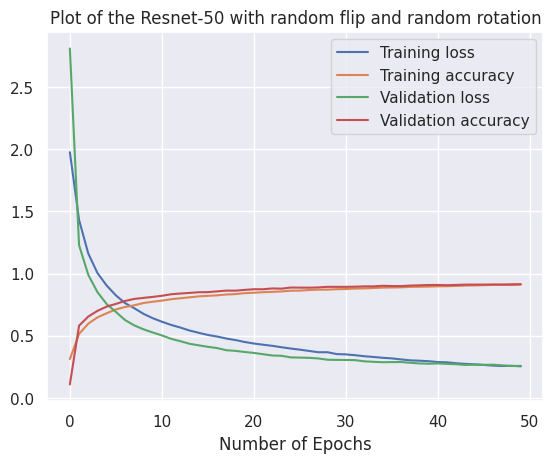

In [ ]:
# Performance plot of ResNet50 for Standard scaled dataset-SGD optimizer, RELU, flip and rotate image

pd.DataFrame(history_resnet50_flip_rotation.history).plot()
plt.xlabel("Number of Epochs")
plt.title(f'Plot of the Resnet-50 with random flip and random rotation')
plt.legend(['Training loss', 'Training accuracy', 'Validation loss', 'Validation accuracy'])
plt.show()

In [ ]:
# ResNet50 for Standard scaled dataset-SGD optimizer, RELU, flip, rotate and contrast image

def final_model_flip_rotate_contrast(inputs):
    resize = keras.layers.UpSampling2D(size=(7,7))(inputs)
    flip = keras.layers.RandomFlip("horizontal_and_vertical")(resize)
    rotate = keras.layers.RandomRotation(0.2)(flip)
    contrast = keras.layers.RandomContrast(0.2)(rotate)
    resnet_feature_extractor = feature_extractor(contrast)
    classification_output = classifier(resnet_feature_extractor)
    return classification_output

def define_compile_model_flip_rotate_contrast():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model_flip_rotate_contrast(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate=learningrate), metrics = ['accuracy'])
   return model


model_resnet50_flip_rotate_contrast = define_compile_model_flip_rotate_contrast()
history_resnet50_flip_rotate_contrast = model_resnet50_flip_rotate_contrast.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=early_stopping)


94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/50
500/500 [==============================] - 511s 980ms/step - loss: 2.0391 - accuracy: 0.2734 - val_loss: 2.3253 - val_accuracy: 0.1752
Epoch 2/50
500/500 [==============================] - 490s 980ms/step - loss: 1.6613 - accuracy: 0.4235 - val_loss: 2.8657 - val_accuracy: 0.1856
Epoch 3/50
500/500 [==============================] - 490s 980ms/step - loss: 1.4603 - accuracy: 0.4830 - val_loss: 3.7514 - val_accuracy: 0.1906
Epoch 4/50
500/500 [==============================] - 490s 980ms/step - loss: 1.3330 - accuracy: 0.5256 - val_loss: 3.8826 - val_accuracy: 0.2038
Epoch 5/50
500/500 [==============================] - 490s 981ms/step - loss: 1.2417 - accuracy: 0.5588 - val_loss: 3.9235 - val_accuracy: 0.2176
Epoch 6/50
500/500 [==============================] - 490s 980ms/step - loss: 1.1673 - accuracy: 0.5871 - val_loss: 3.8990 - val_accuracy: 0.2316


## 5. Hyperparameters Tuning


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/50
500/500 [==============================] - 519s 990ms/step - loss: 0.7007 - accuracy: 0.7611 - val_loss: 2.4107 - val_accuracy: 0.2600
Epoch 2/50
500/500 [==============================] - 508s 1s/step - loss: 0.3800 - accuracy: 0.8721 - val_loss: 0.7791 - val_accuracy: 0.7776
Epoch 3/50
500/500 [==============================] - 501s 1s/step - loss: 0.2699 - accuracy: 0.9075 - val_loss: 0.5709 - val_accuracy: 0.8276
Epoch 4/50
500/500 [==============================] - 502s 1s/step - loss: 0.1967 - accuracy: 0.9312 - val_loss: 0.5081 - val_accuracy: 0.8412
Epoch 5/50
500/500 [==============================] - 502s 1s/step - loss: 0.1567 - accuracy: 0.9466 - val_loss: 0.6137 - val_accuracy: 0.8300
Epoch 6/50
500/500 [==============================] - 502s 1s/step - loss: 0.1259 - accuracy: 0.9563 - val_loss: 0.4464 - val_accuracy: 0.8716
Epoch 7/50
500/500 [==============================] - 501s 1s/step - loss:

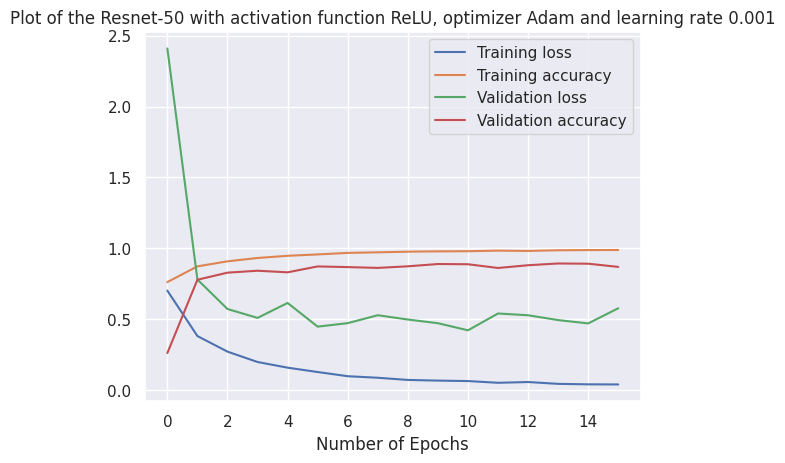

In [28]:
# ResNet50 for Standard scaled dataset-Adam optimizer, RELU
from tensorflow import keras
learningrate = 0.001
batchsize = 100
n_epochs = 50
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

optimizer_adam = keras.optimizers.legacy.Adam

def feature_extractor(inputs):
  feature_extractor = keras.applications.resnet.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')(inputs)
  return feature_extractor

def classifier(inputs):
    x = keras.layers.GlobalAveragePooling2D()(inputs)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="relu")(x)
    x = keras.layers.Dense(512, activation="relu")(x)
    x = keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

def final_model(inputs):
    resize = keras.layers.UpSampling2D(size=(7,7))(inputs)
    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)
    return classification_output

def define_compile_model_adam():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_adam(learning_rate=learningrate), metrics = ['accuracy'])
   return model


model_resnet50_adam = define_compile_model_adam()
history_resnet50_adam = model_resnet50_adam.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=early_stopping)

pd.DataFrame(history_resnet50_adam.history).plot()
plt.xlabel("Number of Epochs")
plt.title(f'Plot of the Resnet-50 with activation function ReLU, optimizer Adam and learning rate 0.001')
plt.legend(['Training loss', 'Training accuracy', 'Validation loss', 'Validation accuracy'])
plt.show()


In [ ]:
# ResNet50 for Standard scaled dataset-Nadam optimizer, RELU

optimizer_nadam = keras.optimizers.legacy.Nadam

def define_compile_model_nadam():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_nadam(learning_rate=learningrate), metrics = ['accuracy'])
   return model


model_resnet50_nadam = define_compile_model_nadam()
history_resnet50_nadam = model_resnet50_nadam.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=early_stopping)

Epoch 1/50
500/500 [==============================] - 505s 976ms/step - loss: 0.6415 - accuracy: 0.7843 - val_loss: 1.3903 - val_accuracy: 0.5370
Epoch 2/50
500/500 [==============================] - 497s 994ms/step - loss: 0.3422 - accuracy: 0.8850 - val_loss: 0.5810 - val_accuracy: 0.8092
Epoch 3/50
500/500 [==============================] - 495s 991ms/step - loss: 0.2357 - accuracy: 0.9205 - val_loss: 0.5692 - val_accuracy: 0.8306
Epoch 4/50
500/500 [==============================] - 495s 990ms/step - loss: 0.1807 - accuracy: 0.9381 - val_loss: 0.4575 - val_accuracy: 0.8596
Epoch 5/50
500/500 [==============================] - 494s 989ms/step - loss: 0.1351 - accuracy: 0.9535 - val_loss: 0.4191 - val_accuracy: 0.8674
Epoch 6/50
500/500 [==============================] - 495s 990ms/step - loss: 0.1068 - accuracy: 0.9628 - val_loss: 0.4198 - val_accuracy: 0.8752
Epoch 7/50
500/500 [==============================] - 488s 976ms/step - loss: 0.0921 - accuracy: 0.9688 - val_loss: 0.3936 -

Epoch 1/50
500/500 [==============================] - 498s 987ms/step - loss: 1.1060 - accuracy: 0.6188 - val_loss: 2.2856 - val_accuracy: 0.2714
Epoch 2/50
500/500 [==============================] - 506s 1s/step - loss: 0.5134 - accuracy: 0.8255 - val_loss: 0.4974 - val_accuracy: 0.8254
Epoch 3/50
500/500 [==============================] - 507s 1s/step - loss: 0.3634 - accuracy: 0.8771 - val_loss: 0.3883 - val_accuracy: 0.8656
Epoch 4/50
500/500 [==============================] - 507s 1s/step - loss: 0.2821 - accuracy: 0.9064 - val_loss: 0.3562 - val_accuracy: 0.8816
Epoch 5/50
500/500 [==============================] - 502s 1s/step - loss: 0.2300 - accuracy: 0.9240 - val_loss: 0.3272 - val_accuracy: 0.8900
Epoch 6/50
500/500 [==============================] - 505s 1s/step - loss: 0.1904 - accuracy: 0.9385 - val_loss: 0.3163 - val_accuracy: 0.8966
Epoch 7/50
500/500 [==============================] - 507s 1s/step - loss: 0.1589 - accuracy: 0.9506 - val_loss: 0.2958 - val_accuracy: 0.9

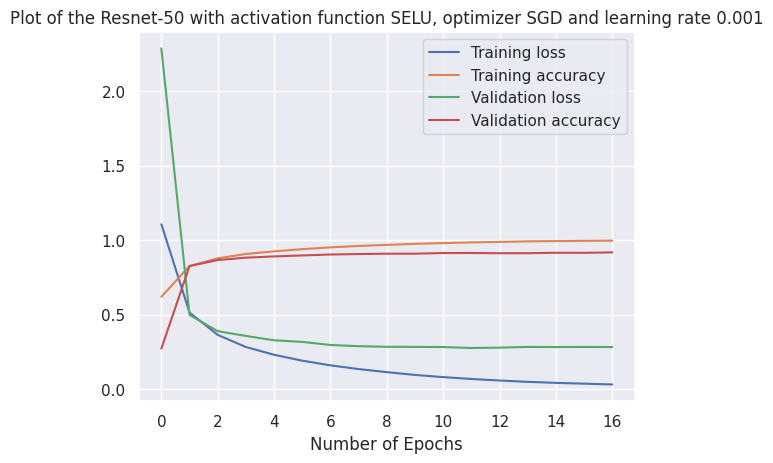

In [30]:
# ResNet50 for Standard scaled dataset-SGD optimizer, SELU

optimizer = keras.optimizers.legacy.SGD

def classifier_selu(inputs):
    x = keras.layers.GlobalAveragePooling2D()(inputs)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="selu")(x)
    x = keras.layers.Dense(512, activation="selu")(x)
    x = keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

def final_model_selu(inputs):
    resize = keras.layers.UpSampling2D(size=(7,7))(inputs)
    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier_selu(resnet_feature_extractor)
    return classification_output

def define_compile_model_selu():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model_selu(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate=learningrate), metrics = ['accuracy'])
   return model


model_resnet50_selu = define_compile_model_selu()
history_resnet50_selu = model_resnet50_selu.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=early_stopping)

pd.DataFrame(history_resnet50_selu.history).plot()
plt.xlabel("Number of Epochs")
plt.title(f'Plot of the Resnet-50 with activation function SELU, optimizer SGD and learning rate 0.001')
plt.legend(['Training loss', 'Training accuracy', 'Validation loss', 'Validation accuracy'])
plt.show()


In [31]:
# Layers and number of parameters of ResNet50 for Standard scaled dataset-SGD optimizer, SELU
model_resnet50_selu.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 224, 224, 3)       0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              2098

In [ ]:
# ResNet50 for Standard scaled dataset-Adam optimizer, SELU

def classifier_selu(inputs):
    x = keras.layers.GlobalAveragePooling2D()(inputs)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="selu")(x)
    x = keras.layers.Dense(512, activation="selu")(x)
    x = keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

def final_model_selu(inputs):
    resize = keras.layers.UpSampling2D(size=(7,7))(inputs)
    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier_selu(resnet_feature_extractor)
    return classification_output

def define_compile_model_adam_selu():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model_selu(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_adam(learning_rate=learningrate), metrics = ['accuracy'])
   return model


model_resnet50_adam_selu = define_compile_model_adam_selu()
history_resnet50_adam_selu = model_resnet50_adam_selu.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=early_stopping)


Epoch 1/50
500/500 [==============================] - 487s 961ms/step - loss: 1.0545 - accuracy: 0.6524 - val_loss: 2.6713 - val_accuracy: 0.2742
Epoch 2/50
500/500 [==============================] - 486s 972ms/step - loss: 0.5194 - accuracy: 0.8202 - val_loss: 0.6895 - val_accuracy: 0.7800
Epoch 3/50
500/500 [==============================] - 485s 971ms/step - loss: 0.3725 - accuracy: 0.8704 - val_loss: 0.5059 - val_accuracy: 0.8310
Epoch 4/50
500/500 [==============================] - 485s 970ms/step - loss: 0.2893 - accuracy: 0.9006 - val_loss: 0.5691 - val_accuracy: 0.8150
Epoch 5/50
500/500 [==============================] - 486s 971ms/step - loss: 0.2312 - accuracy: 0.9211 - val_loss: 0.4899 - val_accuracy: 0.8420
Epoch 6/50
500/500 [==============================] - 485s 970ms/step - loss: 0.1847 - accuracy: 0.9361 - val_loss: 0.7497 - val_accuracy: 0.8028
Epoch 7/50
500/500 [==============================] - 486s 972ms/step - loss: 0.1548 - accuracy: 0.9461 - val_loss: 0.4978 -

In [ ]:
# ResNet50 for Standard scaled dataset-Nadam optimizer, SELU

def define_compile_model_nadam_selu():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model_selu(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_nadam(learning_rate=learningrate), metrics = ['accuracy'])
   return model


model_resnet50_nadam_selu = define_compile_model_nadam_selu()
history_resnet50_nadam_selu = model_resnet50_nadam_selu.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=early_stopping)


Epoch 1/50
500/500 [==============================] - 500s 965ms/step - loss: 0.8022 - accuracy: 0.7439 - val_loss: 1.9931 - val_accuracy: 0.3838
Epoch 2/50
500/500 [==============================] - 487s 974ms/step - loss: 0.3736 - accuracy: 0.8724 - val_loss: 0.7914 - val_accuracy: 0.7696
Epoch 3/50
500/500 [==============================] - 487s 974ms/step - loss: 0.2796 - accuracy: 0.9046 - val_loss: 1.8841 - val_accuracy: 0.6746
Epoch 4/50
500/500 [==============================] - 487s 975ms/step - loss: 0.2181 - accuracy: 0.9247 - val_loss: 0.4438 - val_accuracy: 0.8610
Epoch 5/50
500/500 [==============================] - 488s 977ms/step - loss: 0.1653 - accuracy: 0.9428 - val_loss: 0.7891 - val_accuracy: 0.7994
Epoch 6/50
500/500 [==============================] - 496s 991ms/step - loss: 0.1357 - accuracy: 0.9541 - val_loss: 0.6941 - val_accuracy: 0.8140
Epoch 7/50
500/500 [==============================] - 507s 1s/step - loss: 0.1095 - accuracy: 0.9622 - val_loss: 0.5032 - va

In [ ]:
# ResNet50 for Standard scaled dataset-Adam optimizer, Mish
optimizer_adam = keras.optimizers.legacy.Adam

def classifier_mish(inputs):
    x = keras.layers.GlobalAveragePooling2D()(inputs)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="mish")(x)
    x = keras.layers.Dense(512, activation="mish")(x)
    x = keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

def final_model_mish(inputs):
    resize = keras.layers.UpSampling2D(size=(7,7))(inputs)
    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier_mish(resnet_feature_extractor)
    return classification_output

def define_compile_model_adam_mish():
   inputs = keras.layers.Input(shape=(32,32,3))
   classification_output = final_model_mish(inputs)
   model = keras.Model(inputs=inputs, outputs = classification_output)
   model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_adam(learning_rate=learningrate), metrics = ['accuracy'])
   return model

model_resnet50_adam_mish = define_compile_model_adam_mish()
history_resnet50_adam_mish = model_resnet50_adam_mish.fit(X_train_standardscaler, y_train, epochs=n_epochs, validation_data = (X_val_standardscaler, y_val), batch_size=batchsize, callbacks=early_stopping)


Epoch 1/50
500/500 [==============================] - 505s 997ms/step - loss: 0.7166 - accuracy: 0.7554 - val_loss: 2.1476 - val_accuracy: 0.3398
Epoch 2/50
500/500 [==============================] - 496s 993ms/step - loss: 0.3836 - accuracy: 0.8704 - val_loss: 0.5754 - val_accuracy: 0.8022
Epoch 3/50
500/500 [==============================] - 502s 1s/step - loss: 0.2691 - accuracy: 0.9086 - val_loss: 0.5518 - val_accuracy: 0.8272
Epoch 4/50
500/500 [==============================] - 497s 994ms/step - loss: 0.1951 - accuracy: 0.9326 - val_loss: 0.5576 - val_accuracy: 0.8316
Epoch 5/50
500/500 [==============================] - 496s 993ms/step - loss: 0.1531 - accuracy: 0.9474 - val_loss: 0.5744 - val_accuracy: 0.8514
Epoch 6/50
500/500 [==============================] - 497s 993ms/step - loss: 0.1297 - accuracy: 0.9547 - val_loss: 0.4617 - val_accuracy: 0.8646
Epoch 7/50
500/500 [==============================] - 495s 989ms/step - loss: 0.1043 - accuracy: 0.9638 - val_loss: 0.5624 - va

## 6. Model Prediction


In [32]:
# Evaluate the final CNN on testing dataset
test_res = model_resnet50_selu.evaluate(X_test_standardscaler, y_test)
print("The testing loss of the final CNN model is: ", test_res[0])
print("The testing accuracy score of the final CNN model is: ", test_res[1])

157/157 [==============================] - 19s 95ms/step - loss: 0.2576 - accuracy: 0.9130
The testing loss of the final CNN model is:  0.2575744390487671
The testing accuracy score of the final CNN model is:  0.9129999876022339


In [33]:
# Generate predictions
y_pred = np.argmax(model_resnet50_selu.predict(X_test_standardscaler, verbose = 0), axis = 1)
y_pred

array([8, 8, 9, ..., 3, 1, 1])

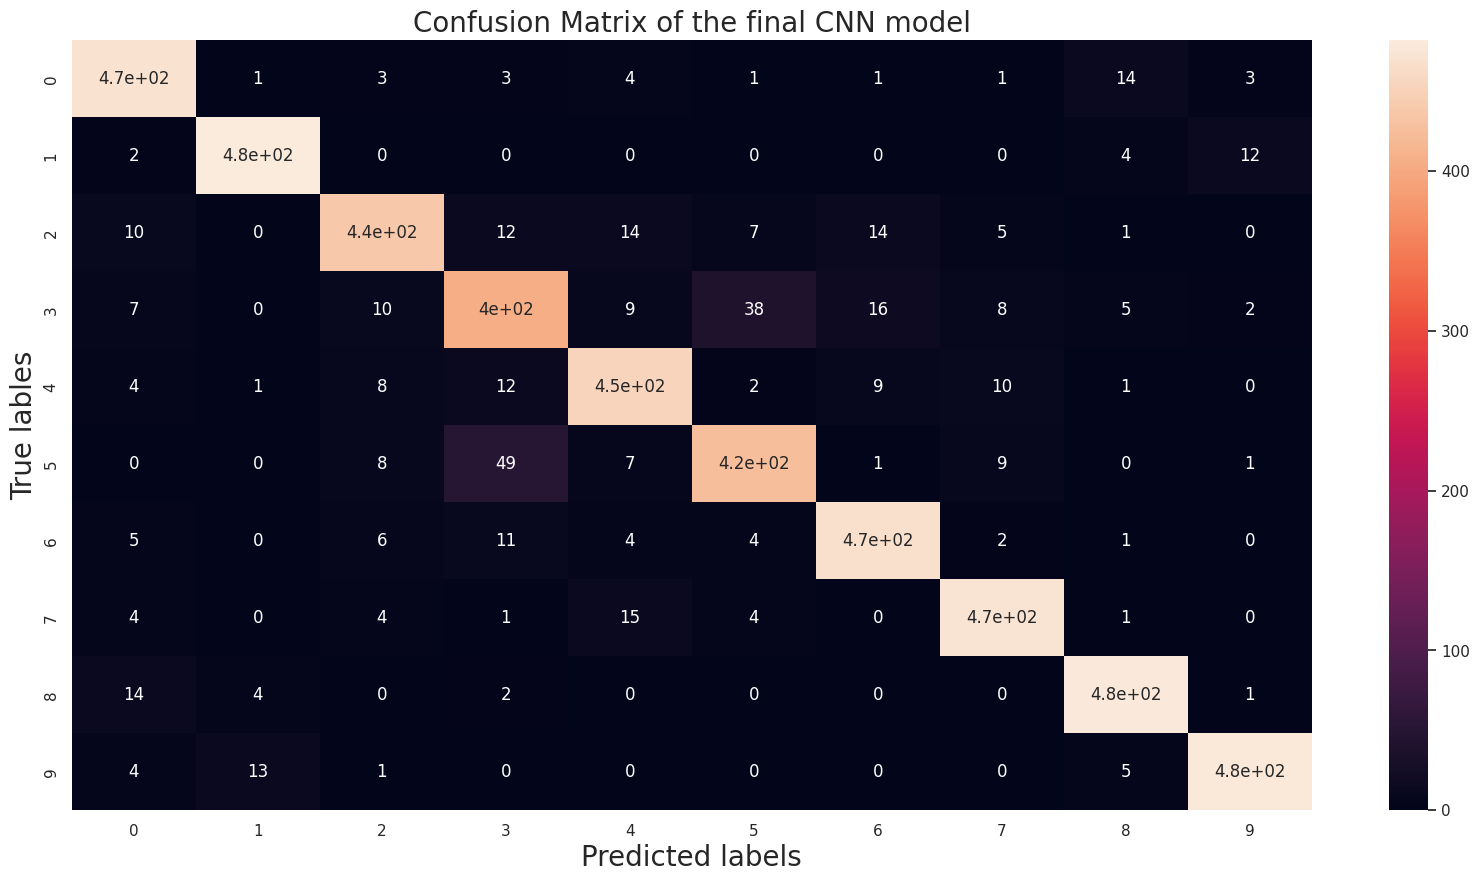

In [34]:
# Assess model's performance
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns

# Confusion matrix of the final CNN model
conf_mat_norm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(conf_mat_norm, annot = True)
plt.xlabel('Predicted labels', fontsize = 20)
plt.ylabel('True lables', fontsize = 20)
plt.title('Confusion Matrix of the final CNN model', fontsize = 20, loc = "center")
plt.show()

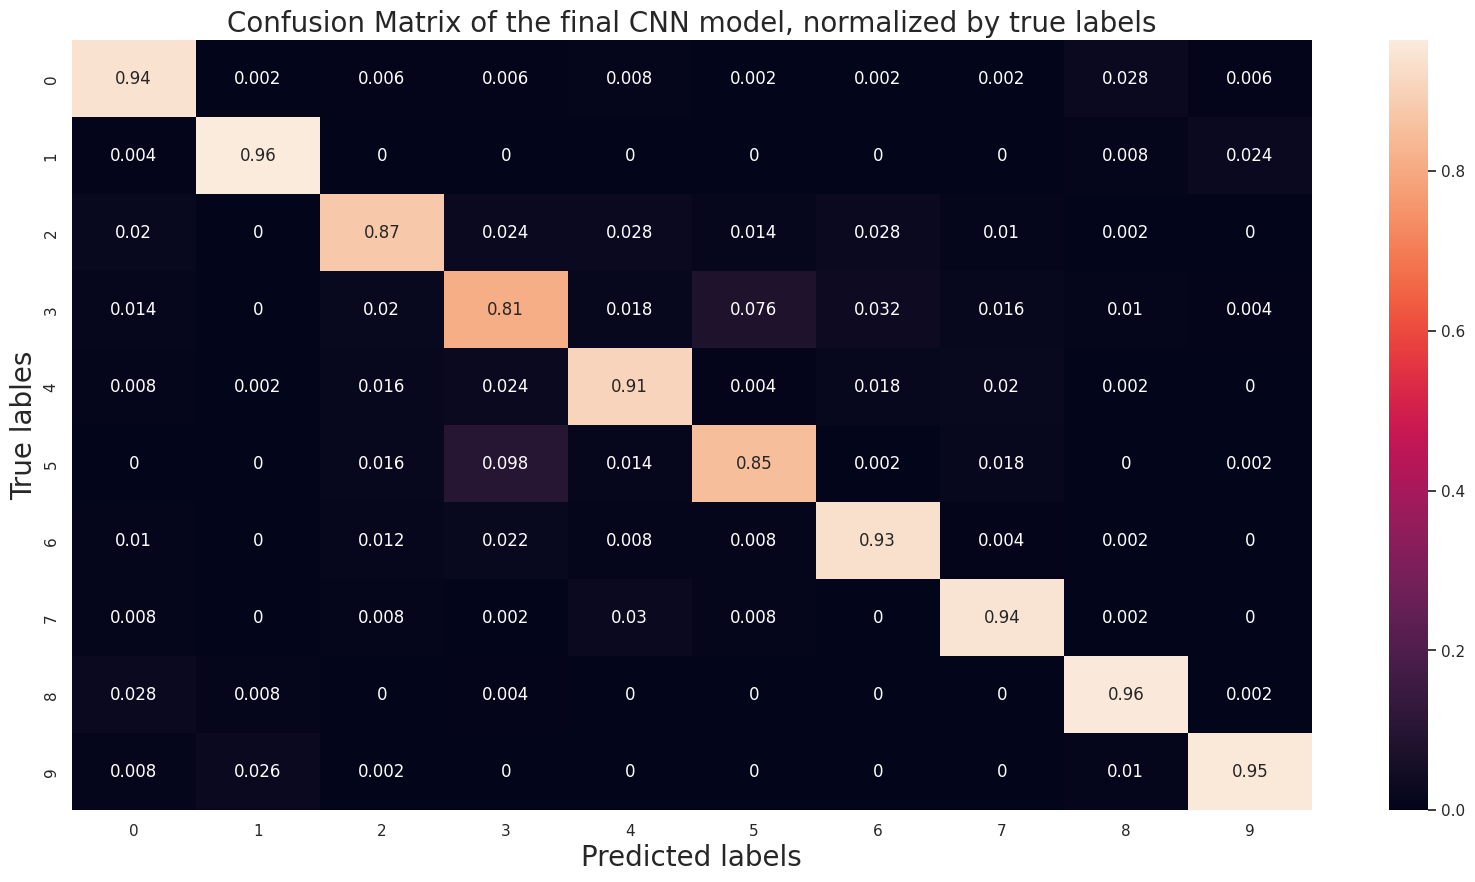

In [35]:
# Confusion matrix of the final CNN model, normalized by true labels
conf_mat_true = confusion_matrix(y_test, y_pred, normalize = "true")
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(conf_mat_true, annot = True)
plt.xlabel('Predicted labels', fontsize = 20)
plt.ylabel('True lables', fontsize = 20)
plt.title('Confusion Matrix of the final CNN model, normalized by true labels', fontsize = 20, loc = "center")
plt.show()

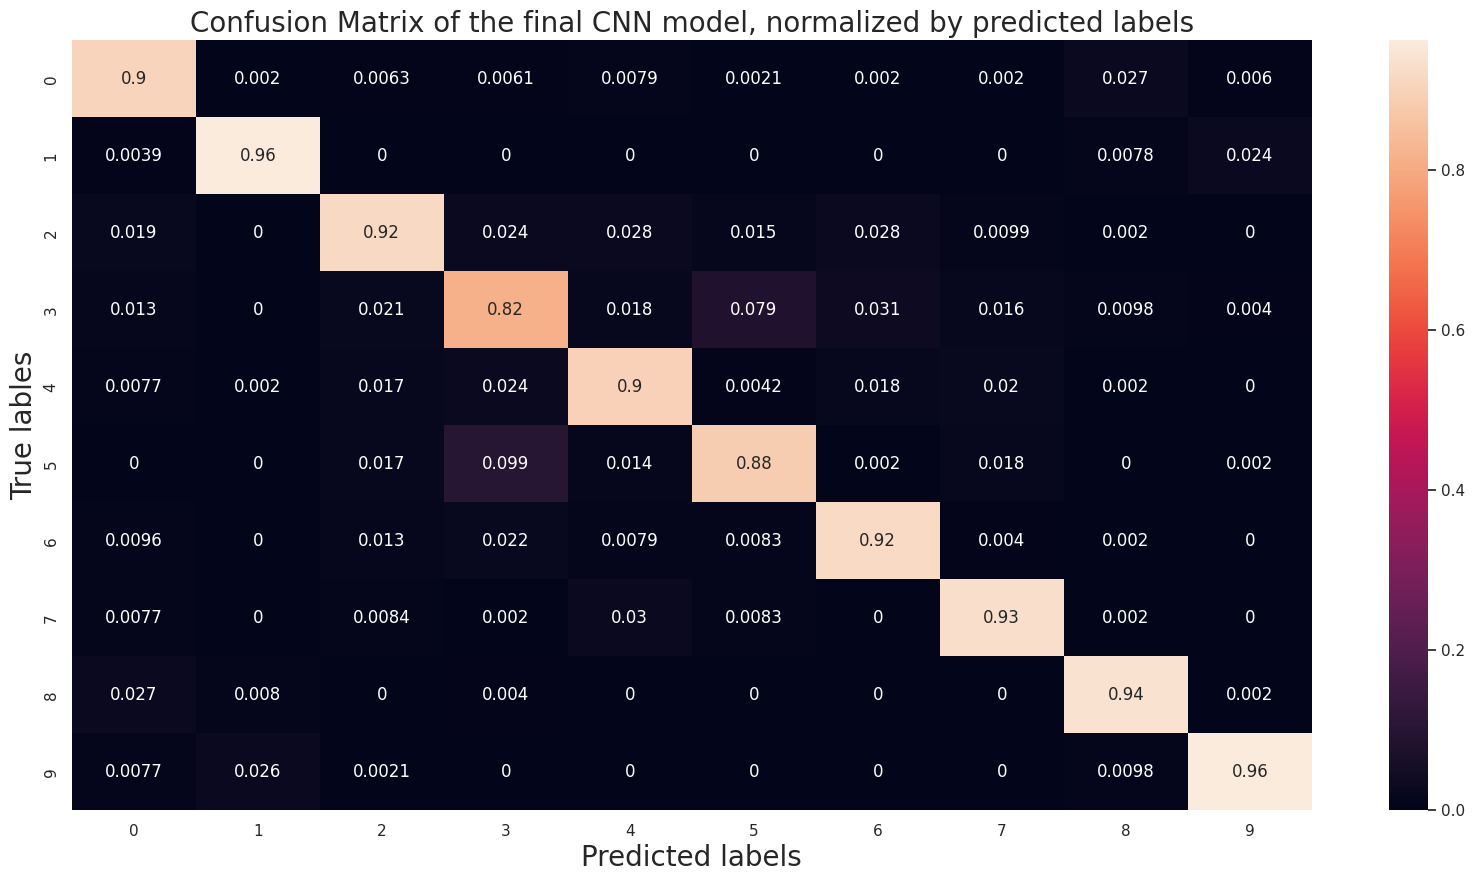

In [36]:
# Confusion matrix of the final CNN model, normalized by predicted labels
conf_mat_pred = confusion_matrix(y_test, y_pred, normalize = "pred")
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(conf_mat_pred, annot = True)
plt.xlabel('Predicted labels', fontsize = 20)
plt.ylabel('True lables', fontsize = 20)
plt.title('Confusion Matrix of the final CNN model, normalized by predicted labels', fontsize = 20, loc = "center")
plt.show()

In [37]:
# Accuracy score for each label
import pandas as pd

acc = pd.DataFrame({'Predicted_labels': y_pred, 'True_labels':y_test})
acc_v = acc[acc['Predicted_labels'] == acc['True_labels']]
acc_v = pd.DataFrame(acc_v.drop('True_labels', axis = 1).value_counts()).sort_index()
acc_v.columns = ["Number_of_correct_prediction"]

count_pred = pd.DataFrame({'Predicted_labels': y_pred}).value_counts()
count_pred = pd.DataFrame(count_pred).sort_index()
count_pred.columns = ["Total_number_of_prediction"]
acc_total = pd.concat([acc_v, count_pred], axis=1)
acc_total['Accuracy_score'] = acc_total['Number_of_correct_prediction']/acc_total['Total_number_of_prediction']

print('The table of accuracy score for each label of the final CNN model:')
acc_total.sort_values('Accuracy_score')

The table of accuracy score for each label of the final CNN model:


,Number_of_correct_prediction,Total_number_of_prediction,Accuracy_score
Predicted_labels,,,
3,405,495,0.818182
5,425,481,0.883576
4,453,506,0.895257
0,469,519,0.903661
2,437,477,0.916143
6,467,508,0.919291
7,471,506,0.930830
8,479,511,0.937378
9,477,496,0.961694


In [38]:
# Total accuracy score for the final CNN model
accuracy_score(y_test, y_pred)

0.913

In [39]:
# Total precision score for the final CNN model
precision_score(y_test, y_pred, average='micro')

0.913

In [40]:
# Sensitivity score, f1-score, precision score for each label of the final CNN model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       500
           1       0.96      0.96      0.96       500
           2       0.92      0.87      0.89       500
           3       0.82      0.81      0.81       500
           4       0.90      0.91      0.90       500
           5       0.88      0.85      0.87       500
           6       0.92      0.93      0.93       500
           7       0.93      0.94      0.94       500
           8       0.94      0.96      0.95       500
           9       0.96      0.95      0.96       500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000

